# Mod 4 Project - Gina Durante

## Overview

The Module 4 Project in the Flatiron School Data Science Version 2 Curriculum is meant to provide students with experience in working with time series data--in this case, monthly housing values from 04/01/1996 to 03/01/2018 for over 14,000 ZIP Codes in the U.S.  Skill sets required to complete this project include dataframe manipulation, data cleaning, data visualization, and time series analysis, and other areas (e.g., using github, Jupyter notebooks for data science projects, and writing and posting a blog).  

## Project topic

The project asks the student to identify the 5 "best" ZIP codes for investment, as defined by the student, and develop support for these recommendations to a hypothetical client (e.g., a real estate investment trust).  The student must develop a methodology for evaluating ZIP codes as potential investment targets and support these findings through a technical Jupyter notebook, a non-technical PowerPoint presentation, and a blog post.  

## My focus:  Sacramento metro area

Because the investment group is located in Sacramento, and because the Sacramento area has experience steady group over the last few decades (fueled in part by skyrocketing costs in the SF Bay Area, prompting some businesses to launch or relocate to the Sacramento region), I focused most of my efforts on the Sacramento metro area.  Because I have lived here for a number of years, I have some knowledge of the region, which has provided some helpful insights informing the analysis.

### Sacramento metro area (counties)

<center><img src='images/Sac_metro_counties_map.png' height=80% width=80%>

### Sacramento metro area (cities)

<center><img src='images/Sac_metro_cities_map.png' height=80% width=80%>

## Methodology, in brief

### Visualization of values by city and/or ZIP code, as well as of predictions of model

I developed iterative functions to visualize values by city within a metro area and across zip codes within cities in a metro area, using lists and dictionaries to iterate through the geographic areas of interest.  Using this approach, I identified 19 ZIP codes in the Sacramento region of possible interest.  Time series analysis of these 19 ZIP codes suggested 11 finalist ZIP codes to explore further.  From those, I selected 5 that I thought provided good (potentially great) returns, while limiting downside risk.  

### Consideration of predicted values, worst- and best-case scenarios, and other factors in the selection process

While the predicted returns over the forecast time horizon were of primary concern, I also took into account the worst-case scenario returns, the best-case scenario returns, the population in the ZIP code, the geographic location of the ZIP code, and personal knowledge of the area to inform my decision-making process.  More information is provided in the "Decision-making process" section of the "Recommended ZIP codes" section at the end of this notebook.


### County representation in finalist and top 5 selected ZIP codes

One of those ZIP codes was in El Dorado County, and the other four were in Placer County.  While there may be promising ZIP codes in both Sacramento and Yolo Counties, Sacramento City ZIP codes that I analyzed were not as competitive as those of Placer County.  I only analyzed one ZIP code in Yolo County (95616 in Davis), though others looked similar in terms of their pattern and trends.  It would probably be worthwhile to analyze one of the two ZIP codes in West Sacramento, as West Sac is an area that has been on the upswing for several years.  


## Possible future directions

Beyond analysis of at least one more ZIP code in the Sacramento area, I've identified several other possible future directions for this work:
- While time limitations prevented a broader evaluation of investment opportunities across the country, the functions I developed allow visualizations of broader swaths of the data (e.g., values by metro area, values by city within a metro area, values by zip codes and cities within a metro area).  
  - Creating visualizations at various geographic levels was very useful for identifying patterns that could signify promising investment opportunities.  
  - From this effort, I identified some geographic areas, such as the Dallas-Fort Worth and the Pittsburg metro areas, that could be worthwhile to explore in future efforts.  
- It could be interesting and potentially valuable to do some backtesting on the model to see how well it predicts the last 24 months for which we have data (May 2016 through April 2018).
- Analyzing shorter time frames (e.g., 2013-2018)
- Scaling investment by population size 
- Construct a basket of investments (e.g., $10M, weighted by ZIP population?)

## A few words on the notebook that follows...

The notebook below is what I used for performing my analyses and arriving at results.  Thus, it is technical and includes all code.  It will most likely be revised over time, so individuals interested in this work should check back periodically.  At the very end of this notebook is a table (small dataframe) that summarizes my analyses.  

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sn

In [2]:
pd.set_option("display.max_rows", 200)

In [3]:
pd.get_option("display.max_rows")

200

In [4]:
df = pd.read_csv('zillow_data.csv')

In [5]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

## Convert time data type to datetime format

In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m', errors = 'raise')

In [7]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

## Fix problem with ZIP codes beginning with '0'

I have surmised that RegionName is the ZIP code for each entry.  RegionName values with only 4 digits represent ZIP codes that actually begin with '0'.  So that I can work with ZIP codes in the data set, I will need to add that zero onto every 4-digit RegionName value.  Once that's completed, I'll rename this column "ZipCode".  

In [8]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [9]:
df.sort_values(by="RegionName").head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5850,58196,1001,Agawam,MA,Springfield,Hampden,5851,113100.0,112800.0,112600.0,...,213900,215700,218200,220100,221100,221700,221700,221700,222700,223600
4199,58197,1002,Amherst,MA,Springfield,Hampshire,4200,161000.0,160100.0,159300.0,...,333700,334800,336700,338900,340400,342000,344500,347400,350600,353300
11213,58200,1005,Barre,MA,Worcester,Worcester,11214,103100.0,103400.0,103600.0,...,205600,206800,208800,210400,211300,213300,215600,217900,219500,220700
6850,58201,1007,Belchertown,MA,Springfield,Hampshire,6851,133400.0,132700.0,132000.0,...,266100,266300,267000,267500,268000,268100,268100,268800,270000,270600
14547,58202,1008,Blandford,MA,Springfield,Hampden,14548,117500.0,117300.0,117100.0,...,202400,202900,205900,208500,207500,205400,204500,206800,210900,214200


In [10]:
df['RegionName'] = df.RegionName.astype(str)
df['RegionName'].dtype


dtype('O')

In [11]:
df.rename(columns={'RegionName': 'Zip'}, inplace=True)
df.columns
df.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [12]:
zips = []

for i in df['Zip']:
    if len(i) < 5:
        i = '0' + i
        zips.append(i)
    else:
        zips.append(i)

zips
df['Zip'] = pd.Series(zips)
df.sort_values(by='Zip').head()
# df.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5850,58196,01001,Agawam,MA,Springfield,Hampden,5851,113100.0,112800.0,112600.0,...,213900,215700,218200,220100,221100,221700,221700,221700,222700,223600
4199,58197,01002,Amherst,MA,Springfield,Hampshire,4200,161000.0,160100.0,159300.0,...,333700,334800,336700,338900,340400,342000,344500,347400,350600,353300
11213,58200,01005,Barre,MA,Worcester,Worcester,11214,103100.0,103400.0,103600.0,...,205600,206800,208800,210400,211300,213300,215600,217900,219500,220700
6850,58201,01007,Belchertown,MA,Springfield,Hampshire,6851,133400.0,132700.0,132000.0,...,266100,266300,267000,267500,268000,268100,268100,268800,270000,270600
14547,58202,01008,Blandford,MA,Springfield,Hampden,14548,117500.0,117300.0,117100.0,...,202400,202900,205900,208500,207500,205400,204500,206800,210900,214200


## Creating dataframes by various groupings and geographies

### Creating US dataframe (df_melt) using melt function

In [13]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zip', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=False)
    melted = melted.dropna(subset=['value'])
    return melted   

In [14]:
df_melt = melt_data(df)


In [15]:
df_melt.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [16]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
RegionID      int64
Zip           object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
time          datetime64[ns]
value         float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 285.7+ MB


In [17]:
df_melt.set_index('time')

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.0
2018-04-01,59107,03293,Woodstock,NH,Claremont,Grafton,14720,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,133400.0


In [18]:
## Dropping RegionID:

df_melt.drop('RegionID', axis=1, inplace=True)

In [19]:
df_melt.head()

,Zip,City,State,Metro,CountyName,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


Dataframe is sorted by SizeRank by default.

In [20]:
df_melt.isna().sum()

Zip                0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
time               0
value              0
dtype: int64

In [21]:
df_melt['Metro'].fillna('Missing', inplace=True)
df_melt.isna().sum()

Zip           0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
time          0
value         0
dtype: int64

In [22]:
# Sorting by zip code, then time

df_melt.sort_values(by=['Zip', 'time'])

,Zip,City,State,Metro,CountyName,SizeRank,time,value
5850,01001,Agawam,MA,Springfield,Hampden,5851,1996-04-01,113100.0
20573,01001,Agawam,MA,Springfield,Hampden,5851,1996-05-01,112800.0
35296,01001,Agawam,MA,Springfield,Hampden,5851,1996-06-01,112600.0
50019,01001,Agawam,MA,Springfield,Hampden,5851,1996-07-01,112300.0
64742,01001,Agawam,MA,Springfield,Hampden,5851,1996-08-01,112100.0
...,...,...,...,...,...,...,...,...
3835273,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7294,2017-12-01,291900.0
3849996,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7294,2018-01-01,294200.0
3864719,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7294,2018-02-01,297500.0
3879442,99901,Ketchikan,AK,Ketchikan,Ketchikan Gateway,7294,2018-03-01,302100.0


Note that a few zip codes are missing; these rows were eliminated when Zip codes with NaN values in the 'value' column were dropped.

In [23]:
df_melt.nunique()

Zip           14723
City           7554
State            51
Metro           702
CountyName     1212
SizeRank      14723
time            265
value         24372
dtype: int64

### Creating new column, MetroState, to address duplicate metro names in different states (e.g., Aberdeen in multiple states)

Wanted to make sure that the values from totally unrelated metro areas in different states weren't inadvertently merged together.

In [24]:
df_melt['MetroState'] = df_melt['Metro'] + ' ' + df_melt['State']

In [25]:
df_melt.head()

,Zip,City,State,Metro,CountyName,SizeRank,time,value,MetroState
0,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0,Chicago IL
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0,Dallas-Fort Worth TX
2,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0,Houston TX
3,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0,Chicago IL
4,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0,El Paso TX


### Creating df_metro (US metro df) with monthly values by Zip

In [26]:
df_melt.set_index('time', inplace=True)

In [27]:
df_melt.head()

,Zip,City,State,Metro,CountyName,SizeRank,value,MetroState
time,,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,1,334200.0,Chicago IL
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,Dallas-Fort Worth TX
1996-04-01,77494,Katy,TX,Houston,Harris,3,210400.0,Houston TX
1996-04-01,60614,Chicago,IL,Chicago,Cook,4,498100.0,Chicago IL
1996-04-01,79936,El Paso,TX,El Paso,El Paso,5,77300.0,El Paso TX


Note:  the dataframe is sorted by zipcode SizeRank by default.  

In [28]:
df_metro = df_melt.groupby(['Metro', 'MetroState', 'CountyName', 'City', 'Zip', 'time']).mean().reset_index()


In [29]:
df_metro.head(10)

,Metro,MetroState,CountyName,City,Zip,time,SizeRank,value
0,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-04-01,5029,86600.0
1,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-05-01,5029,86300.0
2,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-06-01,5029,86100.0
3,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-07-01,5029,85900.0
4,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-08-01,5029,85700.0
5,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-09-01,5029,85600.0
6,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-10-01,5029,85600.0
7,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-11-01,5029,85700.0
8,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1996-12-01,5029,85800.0
9,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,1997-01-01,5029,85900.0


In [30]:
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 8 columns):
Metro         object
MetroState    object
CountyName    object
City          object
Zip           object
time          datetime64[ns]
SizeRank      int64
value         float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 228.6+ MB


In [31]:
df_metro.set_index('time', inplace=True)

In [32]:
df_metro.head()

,Metro,MetroState,CountyName,City,Zip,SizeRank,value
time,,,,,,,
1996-04-01,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,5029,86600.0
1996-05-01,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,5029,86300.0
1996-06-01,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,5029,86100.0
1996-07-01,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,5029,85900.0
1996-08-01,Aberdeen,Aberdeen WA,Grays Harbor,Aberdeen,98520,5029,85700.0


In [33]:
df_metro.nunique()

Metro           702
MetroState      865
CountyName     1212
City           7554
Zip           14723
SizeRank      14723
value         24372
dtype: int64

### Creating df_metro_cities (US Metros df with *City* mean values)

In [34]:
df_metro_cities = df_metro.groupby(['MetroState', 'CountyName', 'City', 'time']).mean().reset_index()

In [35]:
df_metro_cities.head(10)

,MetroState,CountyName,City,time,SizeRank,value
0,Aberdeen WA,Grays Harbor,Aberdeen,1996-04-01,5029.0,86600.0
1,Aberdeen WA,Grays Harbor,Aberdeen,1996-05-01,5029.0,86300.0
2,Aberdeen WA,Grays Harbor,Aberdeen,1996-06-01,5029.0,86100.0
3,Aberdeen WA,Grays Harbor,Aberdeen,1996-07-01,5029.0,85900.0
4,Aberdeen WA,Grays Harbor,Aberdeen,1996-08-01,5029.0,85700.0
5,Aberdeen WA,Grays Harbor,Aberdeen,1996-09-01,5029.0,85600.0
6,Aberdeen WA,Grays Harbor,Aberdeen,1996-10-01,5029.0,85600.0
7,Aberdeen WA,Grays Harbor,Aberdeen,1996-11-01,5029.0,85700.0
8,Aberdeen WA,Grays Harbor,Aberdeen,1996-12-01,5029.0,85800.0
9,Aberdeen WA,Grays Harbor,Aberdeen,1997-01-01,5029.0,85900.0


In [36]:
df_metro_cities.set_index('time', inplace=True)

In [37]:
df_metro_cities.drop('SizeRank', axis=1, inplace=True)

In [38]:
df_metro_cities.head()

,MetroState,CountyName,City,value
time,,,,
1996-04-01,Aberdeen WA,Grays Harbor,Aberdeen,86600.0
1996-05-01,Aberdeen WA,Grays Harbor,Aberdeen,86300.0
1996-06-01,Aberdeen WA,Grays Harbor,Aberdeen,86100.0
1996-07-01,Aberdeen WA,Grays Harbor,Aberdeen,85900.0
1996-08-01,Aberdeen WA,Grays Harbor,Aberdeen,85700.0


In [39]:
df_metro_cities.nunique()

MetroState      865
CountyName     1212
City           7554
value         83532
dtype: int64

### df_geog:  Function for creating a sub-dataframe of a particular geographic unit (e.g., MetroState area, City, CountyName)

In [40]:
def df_geog(df, col, geog):
    
    '''Creates subset dataframe containing just the geographic unit 
    (e.g., 'MetroState' == 'Sacramento CA', 'City' == 'Davis', etc.) of interest.  
    It is necessary to set df equal to a dataframe with the appropriate geographic grouping: 
    e.g., to plot values by city in a metro aree, df = df_metro_cities, col = 'MetroState',
    geog = 'Sacramento CA' (or metro area of interest). 
    '''
    df_metro_cities_geog = df.loc[df[col] == geog]
    return df_metro_cities_geog


### df_sac:  Sac Metro dataframe, values by Zip code

In [41]:
# df_sac = df_melt.loc[df_melt.Metro == 'Sacramento']  # use if function throws an error

df_sac = df_geog(df=df_metro, col = 'MetroState', geog = 'Sacramento CA')

In [42]:
df_sac

,Metro,MetroState,CountyName,City,Zip,SizeRank,value
time,,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,10422,141500.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,10422,141500.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,10422,141500.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,10422,141500.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,10422,141600.0
...,...,...,...,...,...,...,...
2017-12-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,5094,391100.0
2018-01-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,5094,397800.0
2018-02-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,5094,401000.0


In [43]:
df_sac.drop('SizeRank', axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
df_sac

,Metro,MetroState,CountyName,City,Zip,value
time,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,141500.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,141500.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,141500.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,141500.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Camino,95709,141600.0
...,...,...,...,...,...,...
2017-12-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,391100.0
2018-01-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,397800.0
2018-02-01,Sacramento,Sacramento CA,Yolo,Woodland,95776,401000.0


### df_sac_cities:  Sacramento, CA metro area values by city

In [45]:
df_sac_cities = df_geog(df=df_metro_cities, col = 'MetroState', geog = 'Sacramento CA')

In [46]:
df_sac_cities.head()

,MetroState,CountyName,City,value
time,,,,
1996-04-01,Sacramento CA,El Dorado,Camino,141500.0
1996-05-01,Sacramento CA,El Dorado,Camino,141500.0
1996-06-01,Sacramento CA,El Dorado,Camino,141500.0
1996-07-01,Sacramento CA,El Dorado,Camino,141500.0
1996-08-01,Sacramento CA,El Dorado,Camino,141600.0


### df_sac_cities:  Sacramento, CA metro area values by city

In [47]:
df_sac_cities = df_geog(df=df_metro_cities, col = 'MetroState', geog = 'Sacramento CA')

In [48]:
df_sac_cities.head()

,MetroState,CountyName,City,value
time,,,,
1996-04-01,Sacramento CA,El Dorado,Camino,141500.0
1996-05-01,Sacramento CA,El Dorado,Camino,141500.0
1996-06-01,Sacramento CA,El Dorado,Camino,141500.0
1996-07-01,Sacramento CA,El Dorado,Camino,141500.0
1996-08-01,Sacramento CA,El Dorado,Camino,141600.0


## Creating dictionaries -- Sac Metro region

### Function to print first n number of items in a dictionary


In [49]:
# function to print first n number of items in a dictionary

def print_first_n(dictionary, n):
    return {k: dictionary[k] for k in list(dictionary)[:n]}

### Creating sac_metro_cities list from df_sac

In [50]:
sac_metro_cities = list(set(df_sac.City))
sac_metro_cities[:5]

['Orangevale', 'Rancho Cordova', 'Roseville', 'Arden-Arcade', 'Wilton']

In [51]:
sac_metro_cities.sort()
sac_metro_cities[:5]


['Applegate', 'Arden-Arcade', 'Auburn', 'Camino', 'Carmichael']

### Creating sac_metro_zips list from zips in Sac Metro area

In [52]:
sac_metro_zips = list(set(df_sac.Zip))
sac_metro_zips[:5]

['95614', '95618', '96150', '95832', '95661']

### Creating dict_zips_cities dictionary to graph zips by city

In [53]:
df_sac_one_val = df_sac.groupby(['CountyName', 'City', 'Zip']).mean().reset_index()

In [54]:
df_sac_one_val.sort_values(by=['Zip']).head()

#### Seeking to create the dictionary showing just the unique zip code instance rather than repeating it for each row of data) 

,CountyName,City,Zip,value
17,Placer,Auburn,95602,348386.415094
18,Placer,Auburn,95603,311752.830189
87,Yolo,West Sacramento,95605,160125.283019
41,Sacramento,Carmichael,95608,286006.415094
42,Sacramento,Citrus Heights,95610,235864.150943


In [55]:
from collections import defaultdict

dict_sac_zips_cities = defaultdict(list)

for idx,row in df_sac_one_val.iterrows():
    dict_sac_zips_cities[row['City']].append(row['Zip'])
    
print(dict_sac_zips_cities)

defaultdict(<class 'list'>, {'Camino': ['95709'], 'Cool': ['95614'], 'Diamond Springs': ['95619'], 'El Dorado': ['95623'], 'El Dorado Hills': ['95762'], 'Garden Valley': ['95633'], 'Georgetown': ['95634'], 'Pilot Hill': ['95664'], 'Placerville': ['95667'], 'Pollock Pines': ['95726'], 'Rescue': ['95672'], 'Shingle Springs': ['95682'], 'Somerset': ['95636', '95684'], 'South Lake Tahoe': ['96150'], 'Tahoma': ['96142'], 'Applegate': ['95703'], 'Auburn': ['95602', '95603'], 'Carnelian Bay': ['96140'], 'Colfax': ['95713'], 'Foresthill': ['95631'], 'Granite Bay': ['95746'], 'Homewood': ['96141'], 'Kings Beach': ['96143'], 'Lincoln': ['95648'], 'Loomis': ['95650'], 'Meadow Vista': ['95722'], 'Newcastle': ['95658'], 'Penryn': ['95663'], 'Rocklin': ['95677', '95765'], 'Roseville': ['95661', '95678', '95747'], 'Tahoe City': ['96145', '96146'], 'Tahoe Vista': ['96148'], 'Arden-Arcade': ['95821', '95825', '95864'], 'Carmichael': ['95608'], 'Citrus Heights': ['95610', '95621'], 'Elk Grove': ['95624'

In [56]:
from collections import OrderedDict

# Create Ordered dictionary of cities and zip codes

ordict_sac_zips_cities = OrderedDict(sorted(dict_sac_zips_cities.items()))
                                     
type(ordict_sac_zips_cities)


collections.OrderedDict

In [57]:
print_first_n(ordict_sac_zips_cities, n=10)

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140'],
 'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618']}

In [58]:
dict_sac_zips_cities = dict(sorted(ordict_sac_zips_cities.items()))
print_first_n(dict_sac_zips_cities, n=10)

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140'],
 'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618']}

### Function to return slice of an ordered dictionary (for use in plotting)

In [59]:
def return_slice(dictionary, m, n):
    sub_dict = {k: dictionary[k] for k in list(dictionary)[m:n]}
    return sub_dict

In [60]:
dict_0_6 = return_slice(dict_sac_zips_cities, 0, 6)
dict_0_6

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140']}

In [61]:
dict_6_12 = return_slice(dict_sac_zips_cities, 6, 12)
dict_6_12

{'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618'],
 'Diamond Springs': ['95619'],
 'El Dorado': ['95623']}

In [62]:
dict_12_18 = return_slice(dict_sac_zips_cities, 12, 18)
dict_12_18

{'El Dorado Hills': ['95762'],
 'Elk Grove': ['95624', '95757', '95758'],
 'Elverta': ['95626'],
 'Esparto': ['95627'],
 'Fair Oaks': ['95628'],
 'Florin': ['95828']}

In [63]:
dict_18_24 = return_slice(dict_sac_zips_cities, 18, 24)
dict_18_24

{'Folsom': ['95630'],
 'Foresthill': ['95631'],
 'Galt': ['95632'],
 'Garden Valley': ['95633'],
 'Georgetown': ['95634'],
 'Granite Bay': ['95746']}

In [64]:
dict_24_30 = return_slice(dict_sac_zips_cities, 24, 30)
dict_24_30

{'Herald': ['95638'],
 'Homewood': ['96141'],
 'Kings Beach': ['96143'],
 'Lincoln': ['95648'],
 'Loomis': ['95650'],
 'Mather Air Force Base': ['95655']}

In [65]:
dict_30_36 = return_slice(dict_sac_zips_cities, 30, 36)
dict_30_36

{'Meadow Vista': ['95722'],
 'Newcastle': ['95658'],
 'Orangevale': ['95662'],
 'Penryn': ['95663'],
 'Pilot Hill': ['95664'],
 'Placerville': ['95667']}

In [66]:
dict_36_42 = return_slice(dict_sac_zips_cities, 36, 42)
dict_36_42

{'Pollock Pines': ['95726'],
 'Rancho Cordova': ['95670', '95742', '95827'],
 'Rescue': ['95672'],
 'Rio Linda': ['95673'],
 'Rocklin': ['95677', '95765'],
 'Rosemont': ['95826']}

In [67]:
dict_42_48 = return_slice(dict_sac_zips_cities, 42, 48)
dict_42_48

{'Roseville': ['95661', '95678', '95747'],
 'Sacramento': ['95660',
  '95811',
  '95815',
  '95816',
  '95817',
  '95818',
  '95819',
  '95820',
  '95822',
  '95823',
  '95824',
  '95829',
  '95831',
  '95832',
  '95833',
  '95834',
  '95835',
  '95838',
  '95841',
  '95842',
  '95843'],
 'Shingle Springs': ['95682'],
 'Sloughhouse': ['95683'],
 'Somerset': ['95636', '95684'],
 'South Lake Tahoe': ['96150']}

In [68]:
dict_48_54 = return_slice(dict_sac_zips_cities, 48, 54)
dict_48_54

{'Tahoe City': ['96145', '96146'],
 'Tahoe Vista': ['96148'],
 'Tahoma': ['96142'],
 'Walnut Grove': ['95690'],
 'West Sacramento': ['95605', '95691'],
 'Wilton': ['95693']}

In [69]:
dict_54_56 = return_slice(dict_sac_zips_cities, 54, 56)
dict_54_56

{'Winters': ['95694'], 'Woodland': ['95695', '95776']}

# Step 3: EDA/Visualizations

## Plotting functions

### Plotting function:  plot_single_geog function (plots a single geographic unit)

In [70]:
# Be sure to use df with appropriate value grouping (e.g., metro, city, zip)

def plot_single_geog(df, geog_area, col1, col2, figsize=(12, 6), fontsize1=12, fontsize2=16):
    
    ''' Plots housing values for individual geographic unit, e.g., MetroState, City, County.  
    Be sure to use the appropriate dataframe for the selected grouping (df_metro_cities for 
    cities in a metro area, for example).  Specify nrows, ncols, and figsize to match size of list.
    '''
    
    ts = df[col1].loc[df[col2] == geog_area]
    ax = ts.plot(figsize=figsize, fontsize=fontsize1, label = 'Raw Price')
    plt.title(geog_area, fontsize=fontsize2)
    plt.xlabel('')

    max_ = ts.loc['2004':'2010'].idxmax()  
    crash = '01-2009'
    min_ = ts.loc[crash:].idxmin()
    val_2003 = ts.loc['2003-01-01']

    ax.axvline(max_, label='Max price during bubble', color = 'green', ls=':')
    ax.axvline(crash, label = 'Housing Index Drops', color='red', ls=':')
    ax.axvline(min_, label=f'Min price post-crash {min_}', color = 'black', ls=':')
    ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)

    ax.legend(loc='upper left', fontsize=fontsize1)



### Plotting function:   plot_ts_cities (plot values by city)

In [71]:
# Adapted from James Irving's study group:
    
def plot_ts_cities(df, cities, col='value', figsize = (18, 100), fontsize1=14, fontsize2=20, nrows=30, ncols=2, 
                   legend=True, set_ylim = False, ylim = 1400000):
    
    '''Plots housing values by city within a metro area.  Need to use dataframe 
    with values by CITY for just that METRO (specify .loc in arguments that 
    column 'MetroState' == METRO). Need LIST of CITIES within that METRO area.  
    Specify nrows, ncols, and figsize to match size of dataset.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, city in enumerate(cities, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        
        ts = df[col].loc[df['City'] == city]
        ts = ts.rename('Average home values')
        ts.plot(fontsize=fontsize1, ax=ax)
        plt.title(city, fontsize=fontsize2)
        plt.xlabel('')

        try:
            max_ = ts.loc['2004':'2011'].idxmax() 
        except:
            continue
            
        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        try:
            val_2003 = ts.loc['2003-01-01']
        except:
            continue

        ax.axvline(max_, label=f'Max price during \nbubble', color = 'orange', ls=':')
        ax.axvline(crash, label = 'US median house \nprice bottom (crash)', color='black', ls=':')
        ax.axvline(min_, label=f'Min price post-crash', color = 'red', ls=':')
       
        try:
            ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)
        except:
            continue
            
        if set_ylim:
            ax.set_ylim(ylim)
        if legend:
            ax.legend(loc="upper left", fontsize=fontsize1)
            
        fig.tight_layout()
    
    return fig, ax


### Plotting function:  plot_ts_zips (plots individual zip codes in a list provided to the function)

In [72]:
# Adapted from James Irving's study group:
    
def plot_ts_zips(df, zipcodes, col='value', figsize = (12, 6), fontsize1=14, fontsize2=18, nrows=2, ncols=2, 
                 legend=True, set_ylim = False, ylim = 800000):
        
    ''' Plots multiple zip codes in a single axes/figure.  For each zip code, marks dates of:
    1) maximum value reached during the housing bubble; 2) minimum value after the crash;
    3) absolute minimum across entire time horizon (e.g., 1996 if you go back that far);
    4) absolute minimum across entire time horizon (may or may not be the height of the bubble);
    5) date when the national housing index (Case-Schiller) dropped.  
    ''' 

    fig = plt.figure(figsize=figsize)
    
    for i, zc in enumerate(zipcodes, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        
        ts = df[col].loc[df['Zip'] == zc]
        ts = ts.rename(zc)
        ts.plot(ax=ax, fontsize=fontsize1)
        plt.title(zc, fontsize=fontsize2)
        plt.xlabel('')
        
        try: 
            max_ = ts.loc['2004':'2011'].idxmax()  
        except:
            continue

        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        val_2003 = ts.loc['2003-01-01']

        ax.axvline(max_, label=f'Max price during bubble', color = 'orange', ls=':')
        ax.axvline(crash, label = 'US median home price, \npost-bubble low', color='black', ls=':')
        ax.axvline(min_, label=f'ZIP code min price, \npost-crash', color = 'red', ls=':')
        ax.axhline(val_2003, label='Value on \n01/01/2003', color = 'blue', ls='-.', alpha=0.15)
        if set_ylim:
            ax.set_ylim(ylim)
        if legend:
            ax.legend(loc='upper left', fontsize=fontsize1)
    
        fig.tight_layout()
    
    return fig, ax


### Plotting function:  plot_ts_zips_by_city (plot of each city with values by zip codes in a metro area)

In [73]:
# Function below adapted from James Irving's study group:
    
def plot_ts_zips_by_city(df, dict_zips_cities, col='value', figsize = (18, 120), fontsize1=14, fontsize2=18, 
                         nrows=30, ncols=2, legend=True, set_ylim = False, ylim = 1400000):
        
    '''Plots values for zip codes by city within a metro area.  Need to use dataframe 
    with values by ZIP code and CITY for just that METRO (or specify .loc in arguments that 
    column 'MetroState' == METRO). Need DICTIONARY of ZIPS by CITY within that METRO area.  
    Specify nrows, ncols, and figsize to match size of dataset.
    '''

    fig = plt.figure(figsize=figsize)
    
    for i, key in enumerate(sorted(dict_zips_cities.keys()), start=1):
        ax = fig.add_subplot(nrows, ncols, i)

        for val in dict_zips_cities[key]:
            ts = df[col].loc[df['Zip'] == val]
            ts = ts.rename(val)
            ts.plot(ax=ax, fontsize=fontsize1)   
            plt.title(key, fontsize=fontsize2)
            plt.xlabel('')
            
            try: 
                max_ = ts.loc['2004':'2011'].idxmax()  
            except:
                continue

            crash = '01-2009'
            min_ = ts.loc[crash:].idxmin()
            
#             val_2003 = ts.loc['2003-01-01']

#             ax.axvline(max_, label=f'Max price during bubble for {val}', color = 'orange', ls=':')               
#             ax.axvline(min_, label=f'Min Price Post Crash for {val}', color = 'red', ls=':')
#             ax.axvline(crash, color='black')            # if label is desired, insert the following:  label = 'Case-Schiller index declines'
#             ax.axvline('2003-01-01', color = 'blue', ls='-.', alpha=0.15)   # for label, insert the following:  label='2003-01-01'
#             ax.axhline(ts.loc['2003-01-01'], label='2003-01-01 value for {val}', ls='-.', alpha = 0.15)  # can't get this to work on multiple zip plots 
    
            if set_ylim:
                ax.set_ylim(ylim)
            if legend:
                ax.legend(loc="upper left", fontsize=fontsize1)
        
        peak = '01-2007'
        crash = '01-2009'
        ax.axvline(crash, label = 'US median home price, \npost-bubble low', color='red', ls=':')   
        ax.axvline(peak, label = 'US median home price \npeak during bubble', color='black', ls=':')
        ax.axvline('2003-01-01', label = 'Beginning of bubble', color = 'blue', ls='-.', alpha=0.25)
        
        if legend:
            ax.legend(loc='upper left', fontsize=fontsize1)

        fig.tight_layout()
    
    return fig, ax


### Plotting function:  single_zip_boxplot (boxplots of a single ZIP code)

In [74]:
def single_zip_boxplot(df, geog_area, col1 = 'value', col2 = 'Zip', figsize=(8, 4)):
    
    '''Plots boxplots of each zipcode within a city.  Need to use dataframe with values by ZIP 
    for just that CITY (or specify .loc in arguments that column 'City' == CITY in question).
    Need LIST of ZIP codes for that particular CITY.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    ts = df.loc[df[col2] == geog_area]
    ts.boxplot(column = col1)
    plt.title(f'{geog_area}')
    

### Plotting function:  city_zips_boxplot (boxplots of zip codes in a city)

In [75]:
def city_zips_boxplot(df, city_zips, nrows, ncols, figsize=(18, 30)):
    
    '''Plots boxplots of each zipcode within a city.  Need to use dataframe with values by ZIP 
    for just that CITY (or specify .loc in arguments that column 'City' == CITY in question).
    Need LIST of ZIP codes for that particular CITY.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, zc in enumerate(city_zips, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        ts = df.loc[df['Zip'] == zc]
        ts.boxplot(column = 'value', ax = ax)
        ax.set_title(f'{zc}')
        fig.tight_layout()


### Plotting function:  metro_zips_boxplot (boxplots by zip in metro area)

In [76]:
def metro_zips_boxplot(df, metro_zips, nrows, ncols, figsize=(18, 100)):
    
    '''Plots boxplots of each zipcode within a city.  Need to use dataframe with values by ZIP 
    for just that METRO area (or specify .loc in arguments that column 'MetroState' == METRO).
    Need a LIST of ZIP codes within that METRO area.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, zc in enumerate(metro_zips, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        ts = df.loc[df['Zip'] == zc]
        ts.boxplot(column = 'value', ax = ax)
        ax.set_title(f'{zc}')
        fig.tight_layout()


### Plotting function:  metro_cities_boxplot (boxplots by city in metro area)

In [77]:
def metro_cities_boxplot(df, metro_cities, nrows, ncols, figsize=(18, 30)):
    
    '''Plots boxplots of each city within a metro area.  Need to use dataframe with values 
    by CITY for just that METRO (or specify .loc in arguments that column 'MetroState' == METRO.
    Need LIST of CITIES within a particular metro area.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, city in enumerate(metro_cities, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        ts = df.loc[df['City'] == city]
        ts.boxplot(column = 'value', ax = ax)
        ax.set_title(f'{city}')
        fig.tight_layout()


### Plotting function:  metro_cities_zips_boxplot (boxplots by city and zip code in metro area)

In [78]:
def metro_cities_zips_boxplot(df, dict_metro_cities_zips, nrows, ncols, figsize=(18, 40)):
    
    '''Plots boxplots of all zip codes in each city within a metro area.  Need to use dataframe 
    with values by ZIP code and CITY for just that METRO (or specify .loc in arguments that 
    column 'MetroState' == METRO). Need DICTIONARY of ZIPS by CITY within that METRO area.  
    Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, (city, zc) in enumerate(dict_metro_cities_zips.copy().items(), start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        ax.set_title(f'{city}')
        for i, zc in enumerate(dict_metro_cities_zips.copy()[city], start=1):
            ts = df.loc[df['Zip'] == zc]
            ts.boxplot(column = 'value', ax = ax)
            ax.set_title(f'{city}')
            fig.tight_layout()


### Plotting function: violin plot for zip codes in a city or metro area

In [79]:
# got figure size  modification example from https://exceptionshub.com/how-do-i-change-the-figure-size-for-a-seaborn-plot.html

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 6)
# sns.violinplot(x="Zip", y="value", data=df_44, scale="count", inner="stick", ax=ax)

def violin_plt(x, y, data, scale="width", inner="quartile", set_size_inches=(16, 6)):
    
    '''Plots zip codes within a city on one violin plot.  Set defaults to x='Zip', y='value', 
    data=df_sac_city, scale="width", inner="quartile", set_size_inches=(16, 6), ax=ax)
    '''
    
    import seaborn as sns
    fig, ax = plt.subplots()
    fig.set_size_inches
    sns.violinplot(x, y, data, scale, inner, ax)
    
    

### Creating ACF and PACF plots

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot

In [81]:
# Adapted from James Irving's study group discussion

def plot_acf_pacf(ts, figsize=(10,6), lags=15):
    
    ''' Plots both ACF and PACF for given times series (ts).  Time series needs to be a Series 
    (not DataFrame) of values.  Can modify figsize and number of lags if desired.'''

    fig, ax = plt.subplots(nrows=2, figsize=figsize)
    plot_acf(ts, ax=ax[0], lags=lags)
    plot_pacf(ts, ax=ax[1], lags=lags)
    plt.tight_layout()
    
    for a in ax:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
#         a.xaxis_date()
    

### Seasonal Decomposition

In [82]:
# from James Irving's study group
# plot seasonal decomposition

def plot_seasonal_decomp(ts):
    decomp = seasonal_decompose(ts)
    ts_seasonal = decomp.seasonal

    ax = ts_seasonal.plot()
    fig = ax.get_figure()
    fig.set_size_inches(18,6)

    min_ = ts_seasonal.idxmin()
    max_ = ts_seasonal.idxmax()
    max_2 = ts_seasonal.loc[min_:].idxmax()
    min_2 = ts_seasonal.loc[max_2:].idxmin()


    ax.axvline(min_, label=min_, c='orange')
    ax.axvline(max_, c='orange', ls=':')
    ax.axvline(min_2, c='orange')
    ax.axvline(max_2, c='orange', ls=':')

    period = min_2 - min_ 
    ax.set_title(f'Season Length = {period}')
    
    return fig, ax


## Plotting Sacramento values by zip code, grouped by city or within a city

### Plotting values by city

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities, col='value', figsize=(18, 150));


In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[:6], nrows = 3, ncols = 2, figsize=(18,14), col='value', legend=True);

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[6:12], nrows = 3, ncols = 2, figsize=(18,14), col='value', legend=True);

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[12:18], nrows = 3, ncols = 2, figsize=(18,14), col='value', legend=True);


In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[18:24], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[24:30], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[30:36], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[36:42], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[42:48], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[48:54], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

In [ ]:
plot_ts_cities(df_sac_cities, sac_metro_cities[54:56], nrows = 3, ncols = 2, figsize=(16,14), col='value', legend=True)

### Plots of zip codes within City of Sacramento

In [ ]:
df_sacto_city_zips = df_sac.loc[df_sac['City'] == 'Sacramento']
df_sacto_city_zips.head()

In [ ]:
df_sacto_city_zips['Zip'].value_counts()

In [ ]:
sacto_zips = list(set(df_sacto_city_zips['Zip']))
len(sacto_zips)

In [ ]:
ts = df_sacto_city_zips['value'].loc[df_sacto_city_zips['Zip'] == '95823']
ts.head()

In [ ]:
fig, ax = plot_ts_zips(df_sac, sacto_zips, nrows=11, ncols=2, figsize=(18, 50), legend=True);


### Plotting cities and zip codes within Sacramento Metro area 

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_sac_zips_cities, figsize=(18, 120), nrows=30, ncols=2, legend=False);


In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_0_6, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_6_12, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_12_18, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_18_24, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_24_30, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_30_36, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_36_42, figsize=(18, 14), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_42_48, figsize=(16, 13), nrows=3, ncols=2, legend=False);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_48_54, figsize=(16, 13), nrows=3, ncols=2, legend=True);

In [ ]:
fig, ax = plot_ts_zips_by_city(df_sac, dict_54_56, figsize=(16, 13), nrows=3, ncols=2, legend=True);

### Plotting boxplots for each city in Sacto Metro region

In [ ]:
metro_cities_boxplot(df_sac, sac_metro_cities, nrows=10, ncols=6, figsize=(18, 40))


### Plotting boxplots for each zip in Sacramento metro region

In [ ]:
metro_zips_boxplot(df_sac, sac_metro_zips, nrows = 12, ncols=8, figsize=(18, 60))


In [ ]:
metro_cities_zips_boxplot(df_sac, dict_sac_zips_cities, nrows=14, ncols=6, figsize=(18, 50))


In [ ]:
df_sac_city = df_sac.loc[df_sac['City'] == 'Sacramento']

df_sac_city.head()

In [ ]:
sacto_zips = list(set(df_sac_city['Zip']))
len(sacto_zips)


In [ ]:
df_sac_city.boxplot(by='Zip', column = 'value', figsize=(16, 6))


### Violin plot for Sacramento city zip codes

In [ ]:
import seaborn as sns


In [ ]:
# got figure size  modification example from https://exceptionshub.com/how-do-i-change-the-figure-size-for-a-seaborn-plot.html

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 6)
# sns.violinplot(x="Zip", y="value", data=df_44, scale="count", inner="stick", ax=ax)

def violin_plt(x, y, data, scale="width", inner="quartile", set_size_inches=(16, 6)):
    
    '''Plots zip codes within a city on one violin plot.  Set defaults to x='Zip', y='value', 
    data=df_sac_city, scale="width", inner="quartile", set_size_inches=(16, 6), ax=ax)
    '''
    
    import seaborn as sns
    fig, ax = plt.subplots()
    fig.set_size_inches
    sns.violinplot(x, y, data, scale, inner, ax)
    
    

In [ ]:
# got figure size  modification example from https://exceptionshub.com/how-do-i-change-the-figure-size-for-a-seaborn-plot.html

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 6)
# sns.violinplot(x="Zip", y="value", data=df_44, scale="count", inner="stick", ax=ax)

import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city, scale="width", inner="quartile", ax=ax)

In [ ]:
df_sac_city_1996_1999 = df_sac_city.loc['1996-04-01':'1999-12-01']
df_sac_city_1996_1999.tail()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city_1996_1999, scale="width", inner="quartile", ax=ax)

In [ ]:
df_sac_city_2000_2003 = df_sac_city.loc['2000-01-01':'2003-12-01']
df_sac_city_2000_2003.head()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city_2000_2003, scale="width", inner="quartile", ax=ax)

In [ ]:
df_sac_city_2004_2006 = df_sac_city.loc['2004-01-01':'2006-12-01']
df_sac_city_2004_2006.head()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city_2004_2006, scale="width", inner="quartile", ax=ax)

In [ ]:
df_sac_city_2007_2012 = df_sac_city.loc['2007-01-01':'2012-12-01']
df_sac_city_2007_2012.head()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city_2007_2012, scale="width", inner="quartile", ax=ax)

In [ ]:
df_sac_city_2013_2018 = df_sac_city.loc['2013-01-01':'2018']
df_sac_city_2013_2018.tail()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.violinplot(x="Zip", y="value", data=df_sac_city_2013_2018, scale="width", inner="quartile", ax=ax)

# Step 4:  ARIMA Modeling

## Setting up functions for running ARIMA models

In [83]:
# Set geog_area = ZIP code

geog_area = '95616'

In [84]:
ts = df_melt['value'].loc[df_melt['Zip'] == geog_area]

In [85]:
ts.head()

time
1996-04-01    202500.0
1996-05-01    202500.0
1996-06-01    202500.0
1996-07-01    202500.0
1996-08-01    202500.0
Name: value, dtype: float64

### Function for model parameter fine-tuning

In [86]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


### Creating p, d, q, and m values for running ARIMA model

In [137]:
# evaluate parameters
p_values = [0, 1, 2, 4, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")


In [138]:
import itertools

p_range = [0, 1, 2, 4, 8, 10]
q_range = range(0, 3)
d_range = range(1, 3)
m_range = (0, 6, 12)

pdq = list(itertools.product(p_range, d_range, q_range))
print(pdq)
print()
PDQM = list(itertools.product(p_range, d_range, q_range, m_range))
print(PDQM[:20])

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 2, 0), (4, 2, 1), (4, 2, 2), (8, 1, 0), (8, 1, 1), (8, 1, 2), (8, 2, 0), (8, 2, 1), (8, 2, 2), (10, 1, 0), (10, 1, 1), (10, 1, 2), (10, 2, 0), (10, 2, 1), (10, 2, 2)]

[(0, 1, 0, 0), (0, 1, 0, 6), (0, 1, 0, 12), (0, 1, 1, 0), (0, 1, 1, 6), (0, 1, 1, 12), (0, 1, 2, 0), (0, 1, 2, 6), (0, 1, 2, 12), (0, 2, 0, 0), (0, 2, 0, 6), (0, 2, 0, 12), (0, 2, 1, 0), (0, 2, 1, 6), (0, 2, 1, 12), (0, 2, 2, 0), (0, 2, 2, 6), (0, 2, 2, 12), (1, 1, 0, 0), (1, 1, 0, 6)]


## Parameter fine-tuning function

In [139]:
# def arima_predict_error(X, arima_order):
#     train_size = int(len(X) * .85)
#     train, test = X[0:train_size], X[train_size:]
#     predictions = list()
#     history = [x for x in train]
#     for t in range(len(test)):
#         model = ARIMA(history, order = arima_order)
#         model_fit = model.fit(disp=0)
#         y_hat = model_fit.forecast()[0]
#         predictions.append(y_hat)
#         history.append(test[t])
#     error = mean_squared_error(test, predictions)
#     return error

# def eval_arima_models(data, p_values, d_values, q_values):
#     data = data.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = arima_predict_error(data, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
#     return best_cfg


In [220]:
def arima_predict_error(X, arima_order):
    train_size = int(len(X) * .85)
    train, test = X[0:train_size], X[train_size:]
    predictions = list()
    history = [x for x in train]
    for t in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit(disp=0)
        y_hat = model_fit.forecast()[0]
        predictions.append(y_hat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error



In [222]:
def eval_arima_models(ts, p_values, d_values, q_values):
    ts_value = ts['value']
    ts_value = ts_value.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = arima_predict_error(ts_value, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg


In [157]:
# # Adapted from Jeff Herman's starter notebook

# def param_fine_tune(data, p_values, d_values, q_values):
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
    

    
    
#     arima_order = (p,d,q)
    
    
# def arima_predict_error(X, arima_order):
#     train_size = int(len(X) * .85)
#     train, test = X[0:train_size], X[train_size:]
#     predictions = list()
#     history = [x for x in train]
#     for t in range(len(test)):
#         model = ARIMA(history, order = arima_order)
#         model_fit = model.fit(disp=0)
#         y_hat = model_fit.forecast()[0]
#         predictions.append(y_hat)
#         history.append(test[t])
#     error = mean_squared_error(test, predictions)
#     return error

# def eval_arima_models(data, p_values, d_values, q_values):
#     data = data.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = arima_predict_error(data, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
#     return best_cfg


In [90]:
# eval_arima_models(ts.values, p_values, d_values, q_values)    

# Step 5: Functions for Interpreting Results

## Create ARIMA model show summary results table

In [235]:
# Define function

def arima_zipcode(ts, order):
    ts_value = ts.value
    model = ARIMA(ts_value, order = order)
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    return model_fit

# model_fit = arima_zipcode(ts_values, order = order)

In [92]:
# model_fit = arima_zipcode(ts_values, order = order)

## Create forecast model

In [93]:
# Define function

def forecast(model_fit, months=24, confint=2):
    forecast = model_fit.forecast(months)
    actual_forecast = forecast[0]
    std_error = forecast[1]
    forecast_confint = forecast[confint]
    return actual_forecast, std_error, forecast_confint   

# actual_forecast, std_error, forecast_confint = forecast(model_fit)

In [94]:
# actual_forecast, std_error, forecast_confint  

## Create dataframe to hold these values and join to existing dataframe

In [95]:
# Define function

def forecast_df(actual_forecast, forecast_confint, std_error, col = 'time', 
                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS')):
    df_forecast = pd.DataFrame({col: daterange})
    df_forecast['forecast'] = actual_forecast
    df_forecast['forecast_lower'] = forecast_confint[:, 0]
    df_forecast['forecast_upper'] = forecast_confint[:, 1]
    df_forecast['standard error'] = std_error
    df_forecast.set_index('time', inplace=True)
    return df_forecast


In [96]:
# df_forecast = forecast_df(actual_forecast, forecast_confint, std_error)

## Create df_new with historical and forecasted values

In [285]:
def concat_values_forecast(ts, df_forecast):
    df_new = pd.concat([ts, df_forecast])
    df_new = df_new.rename(columns = {0: 'value'})
    return df_new

In [98]:
# df_new = concat_values_forecast(ts, df_forecast)

In [99]:
# df_new.head()

## Plot forecast results

In [288]:
# Define function

def plot_forecast(df_new, geog_area, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    plt.plot(df_new['value'], label='Raw Data')
    plt.plot(df_new['forecast'], label='Forecast')
    plt.fill_between(df_new.index, df_new['forecast_lower'], df_new['forecast_upper'], color='k', alpha = 0.2, 
                 label='Confidence Interval')
    plt.legend(loc = 'upper left')
    plt.title(f'Forecast for {geog_area}')


In [101]:
# plot_forecast(df_new)

## Figure out percent change in home values

In [102]:
# Define functions

def forecast_values(df_new, date = '2020-04-01'):
    forecasted_price = df_new.loc[date, 'forecast']
    forecasted_lower = df_new.loc[date, 'forecast_lower']
    forecasted_upper = df_new.loc[date, 'forecast_upper']    
    return forecasted_price, forecasted_lower, forecasted_upper


In [103]:
# forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new)

In [104]:
# forecasted_price, forecasted_lower, forecasted_upper

In [105]:
def last_value(df, date = '2018-04-01'):
    last_value = df.loc[date, 'value']
    return last_value


In [106]:
# last_value = last_value(df_new)

In [107]:
# last_value

## Compute and print predicted, best, and worst case scenarios

In [108]:
def pred_best_worst(pred, low, high, last, date='April 1, 2020'):
    
    '''Prints out predicted, best-case, and worst-case scencarios from forecast'''
    
    pred_pct_change = (((pred - last) / last) * 100)
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    lower_pct_change = ((low - last) / last) * 100
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    upper_pct_change = ((high - last) / last) * 100
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')
    print(round(pred_pct_change, 3), round(lower_pct_change, 3), round(upper_pct_change, 3))
        

In [109]:
# pred_pct_change, lower_pct_change, upper_pct_change = pred_best_worst(pred=forecasted_price, low=forecasted_lower, high=forecasted_upper, last=last_value, date='April 1, 2020')


In [110]:
# pred_pct_change, lower_pct_change, upper_pct_change

## Recommendation--Zip code (City):   [Recommendation]

*(Cut and paste the results printed out by the ARIMA modeling and forecasting function.  See example below.)*

By the model prediction, I would expect to see a 1.756% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -14.007% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 17.518% change in price by April 1, 2020


## Function for running ARIMA modeling and generating prediction results

In [289]:
p_values = [0, 1, 2, 4, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

geog_areas = []
cities = []
orders = []
predicted_prices = []
lower_bound_prices = [] 
upper_bound_prices = []
last_values = []
pred_pct_changes = []
lower_pct_changes = []
upper_pct_changes = []


def arima_forecast(ts, geog_area, city, p_values, d_values, q_values, best_pdq, confint=2, run_pdq = False):   # months = 24 by default
    # evaluate parameters
    print(f'For {geog_area} ({city}):')
    p_values = [0, 1, 2, 4, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)
    warnings.filterwarnings("ignore")
    
    if run_pdq:
        eval_arima_models(ts, p_values, d_values, q_values)     # returns order (variable best_cfg)
        order = best_cfg
    else:
        order = best_pdq
        
    print(f'Best ARIMA order = {order}')
    print(ts)
    model_fit = arima_zipcode(ts, order)                                # returns model_fit
    actual_forecast, forecast_confint, std_error = forecast(model_fit)  # returns actual_forecast, forecast_confint, std_error
    df_forecast = forecast_df(actual_forecast, std_error, forecast_confint, col = 'time',     # returns df_forecast with future predictions
                              daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    df_new = concat_values_forecast(ts, df_forecast)                    # concatenates historical and forecasted values into df_new
    print(df_new.head())
    print(df_new.tail())
    plot_forecast(df_new, geog_area)                                    # plots forecast with the label of geog_area
    forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    last_value = last_value(df_new, date = '2018-04-01')                # returns the value on the last date in historical dataset (2018-01-03)
    pred_pct_change, lower_pct_change, upper_pct_change = pred_best_worst(pred,         # returns predicted, worst-case (2 conf. intervals below),
                    low, high, last, date='April 1, 2020')                              # and best-case (2 conf. intervals above) values
                                                                                        # pred_pct_change, lower_pct_change, upper_pct_change
    geog_areas.append(geog_area)
    cities.append(city)
    orders.append(order)
    predicted_prices.append(forecasted_price)
    lower_bound_prices.append(forecasted_lower)
    upper_bound_prices.append(forecasted_upper)
    last_values.append(last_value)
    pred_pct_changes.append(pred_pct_change)
    lower_pct_changes.append(lower_pct_change)
    upper_pct_changes.append(upper_pct_change)
    return geog_areas, cities, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes
           # returns the following as lists:  geog_areas, cities, orders, predicted_prices, lower_bound_prices, 
           # upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


In [276]:
p_values = [0, 1, 2, 4, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

geog_areas = []
cities = []
orders = []
predicted_prices = []
lower_bound_prices = [] 
upper_bound_prices = []
last_values = []
pred_pct_changes = []
lower_pct_changes = []
upper_pct_changes = []


def arima_forecast(ts, geog_area, city, p_values, d_values, q_values, best_pdq, confint=2, run_pdq = False):   # months = 24 by default
    # evaluate parameters
    print(f'For {geog_area} ({city}):')
    p_values = [0, 1, 2, 4, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)
    warnings.filterwarnings("ignore")
    
    if run_pdq:
        eval_arima_models(ts, p_values, d_values, q_values)     # returns order (variable best_cfg)
        order = best_cfg
    else:
        order = best_pdq
        
    print(f'Best ARIMA order = {order}')
    print(ts)
#     arima_zipcode(ts, order)                          # returns model_fit
    forecast(arima_zipcode(ts, order))                  # returns actual_forecast, forecast_confint, std_error
    forecast_df(forecast(arima_zipcode(ts, order))[0],  # returns df_forecast with future predictions
                forecast(arima_zipcode(ts, order))[2], 
                forecast(arima_zipcode(ts, order))[]col = 'time', 
                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    concat_values_forecast(ts, df_forecast)        # concatenates historical and forecasted values into df_new
    print(df_new.head())
    print(df_new.tail())
    plot_forecast(df_new, geog_area)               # plots forecast with the label of geog_area
    forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    last_value(df_new, date = '2018-04-01')        # returns the value on the last date in historical dataset (2018-01-03)
    pred_best_worst(pred, low, high,               # returns predicted, worst-case (2 conf. intervals below),
                    last, date='April 1, 2020')    # and best-case (2 conf. intervals above) values
                                                   # pred_pct_change, lower_pct_change, upper_pct_change

    geog_areas.append(geog_area)
    cities.append(city)
    orders.append(order)
    predicted_prices.append(forecasted_price)
    lower_bound_prices.append(forecasted_lower)
    upper_bound_prices.append(forecasted_upper)
    last_values.append(last_value)
    pred_pct_changes.append(pred_pct_change)
    lower_pct_changes.append(lower_pct_change)
    upper_pct_changes.append(upper_pct_change)
    return geog_areas, cities, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes
           # returns the following as lists:  geog_areas, cities, orders, predicted_prices, lower_bound_prices, 
           # upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


# Analysis by ZIP code

## SacMetro: 95616 (Davis) 

### Set up time series dataframe for this ZIP code

In [121]:
geog_area = '95616'

In [122]:
ts = df_melt.loc[df_melt['Zip'] == geog_area]

In [123]:
ts.head()

,Zip,City,State,Metro,CountyName,SizeRank,value,MetroState
time,,,,,,,,
1996-04-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-05-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-06-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-07-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-08-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA


In [124]:
ts = ts.resample('MS').asfreq()

In [125]:
ts.head()

,Zip,City,State,Metro,CountyName,SizeRank,value,MetroState
time,,,,,,,,
1996-04-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-05-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-06-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-07-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA
1996-08-01,95616,Davis,CA,Sacramento,Yolo,955,202500.0,Sacramento CA


### Visualizations:  95616 (Davis, CA)

#### Line and box plots

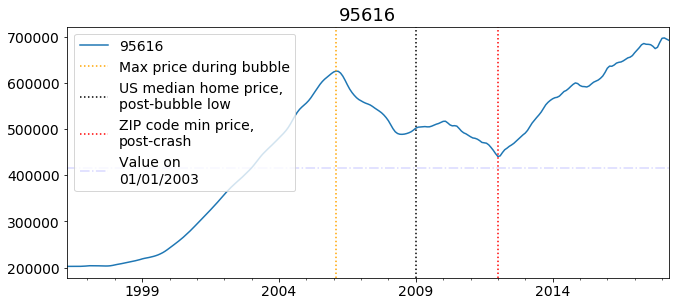

In [126]:
plot_ts_zips(df_melt, col='value', figsize=(18, 8), zipcodes=['95616']);

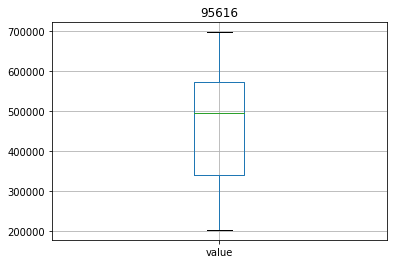

In [127]:
ts.boxplot(column = 'value')
plt.title('95616');


#### ACF and PACF plot

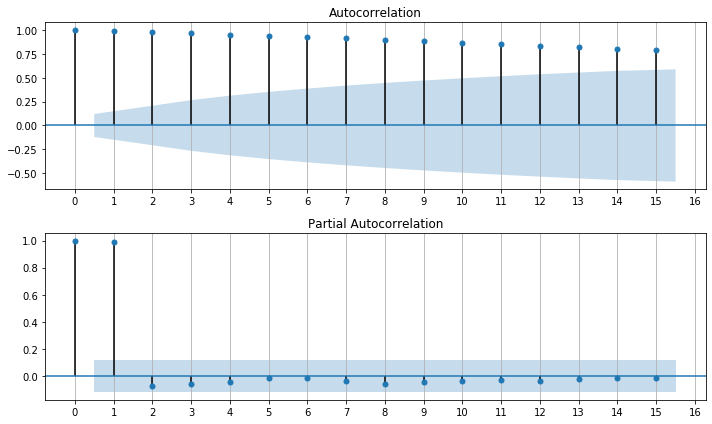

In [128]:
plot_acf_pacf(ts.value)

#### Seasonal Decomposition

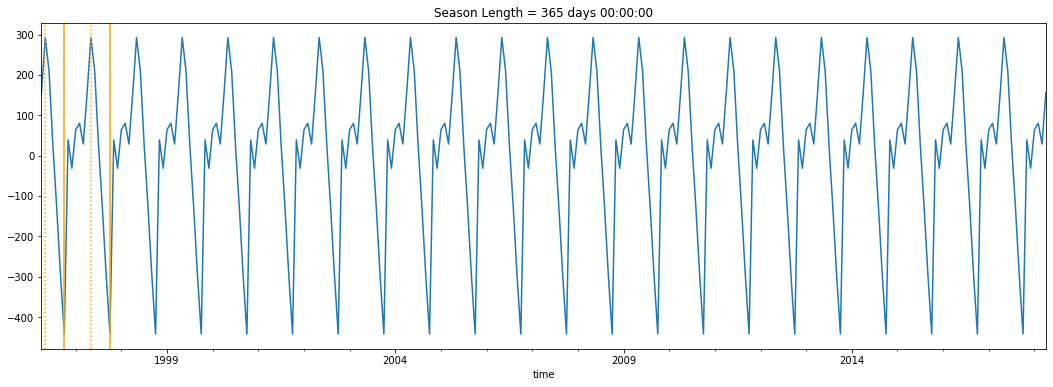

In [129]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA modeling and forecasting results

In [224]:
# arima_forecast(ts, '95616', 'Davis', p_values, d_values, q_values)  # (produces Best ARIMA(2, 1, 2) MSE=4035352.413)


For 95616 (Davis):
ARIMA(0, 0, 0) MSE=42458532025.858
ARIMA(0, 0, 1) MSE=10708928644.462
ARIMA(0, 1, 0) MSE=13405273.211
ARIMA(0, 1, 1) MSE=5828581.221
ARIMA(0, 2, 0) MSE=9312480.329
ARIMA(0, 2, 1) MSE=6321527.892
ARIMA(1, 0, 0) MSE=18597889.711
ARIMA(1, 1, 0) MSE=8776594.779
ARIMA(1, 1, 1) MSE=5672167.133
ARIMA(1, 1, 2) MSE=4787450.348
ARIMA(1, 2, 0) MSE=8848416.715
ARIMA(1, 2, 1) MSE=6507749.602
ARIMA(2, 0, 1) MSE=5815203.801
ARIMA(2, 0, 2) MSE=5273127.510
ARIMA(2, 1, 0) MSE=7736073.424
ARIMA(2, 1, 1) MSE=5746161.029
ARIMA(2, 1, 2) MSE=4035352.413
ARIMA(2, 2, 0) MSE=5781558.424
ARIMA(2, 2, 1) MSE=5371716.844
ARIMA(2, 2, 2) MSE=4492411.094
ARIMA(4, 0, 0) MSE=5629227.425
ARIMA(4, 0, 1) MSE=5173173.083
ARIMA(4, 0, 2) MSE=4140675.493
ARIMA(4, 1, 0) MSE=5069812.501
ARIMA(4, 1, 1) MSE=5030509.557
ARIMA(4, 2, 0) MSE=5162780.421
ARIMA(4, 2, 1) MSE=5197933.157
ARIMA(8, 0, 0) MSE=4920179.084
ARIMA(8, 0, 1) MSE=4798690.146
ARIMA(8, 1, 0) MSE=4814233.028
ARIMA(8, 2, 0) MSE=4912362.737
ARIMA(8, 2

NameError: name 'best_cfg' is not defined

For 95616 (Davis):
Best ARIMA order = (2, 1, 2)
              Zip   City State       Metro CountyName  SizeRank     value  \
time                                                                        
1996-04-01  95616  Davis    CA  Sacramento       Yolo       955  202500.0   
1996-05-01  95616  Davis    CA  Sacramento       Yolo       955  202500.0   
1996-06-01  95616  Davis    CA  Sacramento       Yolo       955  202500.0   
1996-07-01  95616  Davis    CA  Sacramento       Yolo       955  202500.0   
1996-08-01  95616  Davis    CA  Sacramento       Yolo       955  202500.0   
...           ...    ...   ...         ...        ...       ...       ...   
2017-12-01  95616  Davis    CA  Sacramento       Yolo       955  687700.0   
2018-01-01  95616  Davis    CA  Sacramento       Yolo       955  696700.0   
2018-02-01  95616  Davis    CA  Sacramento       Yolo       955  697500.0   
2018-03-01  95616  Davis    CA  Sacramento       Yolo       955  695000.0   
2018-04-01  95616  Davis    

UnboundLocalError: local variable 'last_value' referenced before assignment

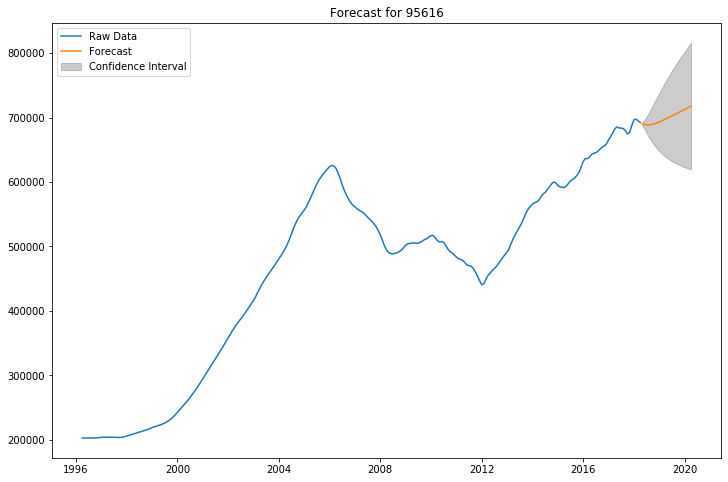

In [290]:
arima_forecast(ts, '95616', 'Davis', p_values, d_values, q_values, best_pdq=(2,1,2))  # (produces Best ARIMA(2, 1, 2) MSE=4035352.413)


## Recommendation--Zip code 95616:   would not recommend

By the model prediction, I would expect to see a 1.756% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -14.007% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 17.518% change in price by April 1, 2020


# SacMetro: 95619 (Diamond Springs) -- Good potential investment candidate

### Visualizations:  95619 (Diamond Springs)

#### Set up time series dataframe for this ZIP code

In [238]:
ts_95619 = df_sac.loc[df_sac['Zip'] == '95619']  # ts for all of the following functions should have only one zipcode
ts_95619.head()


,Metro,MetroState,CountyName,City,Zip,value
time,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,122400.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121800.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121200.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120700.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120200.0


In [239]:
# ts.head()

ts_95619.head()

,Metro,MetroState,CountyName,City,Zip,value
time,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,122400.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121800.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121200.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120700.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120200.0


In [240]:
# ts = ts.value

ts_95619_values = ts_95619.value

In [241]:
# ts.head()

ts_95619_values.head()

time
1996-04-01    122400.0
1996-05-01    121800.0
1996-06-01    121200.0
1996-07-01    120700.0
1996-08-01    120200.0
Name: value, dtype: float64

#### Line plots and box plots

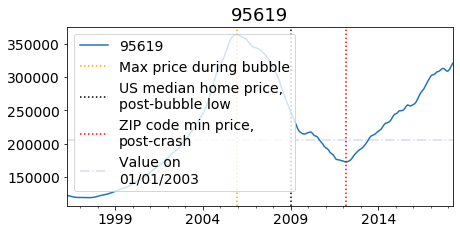

In [242]:
fig, ax = plot_ts_zips(df_melt, zipcodes=['95619'])  # enter desired zip code(s)

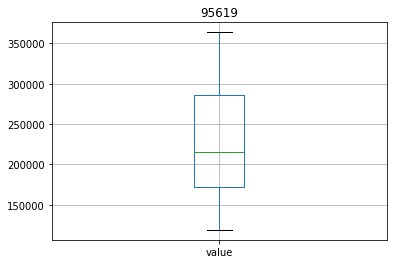

In [243]:
ts_95619.boxplot(column = 'value')
plt.title('95619');


#### ACF and PACF

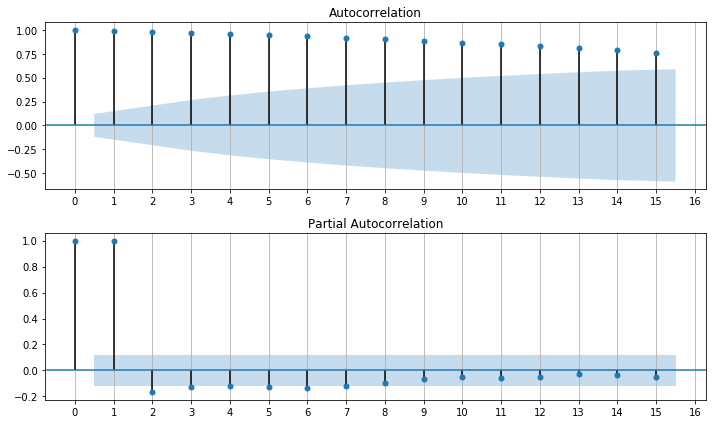

In [244]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95619_values, figsize=(10,6), lags=15)

#### Seasonal decomposition

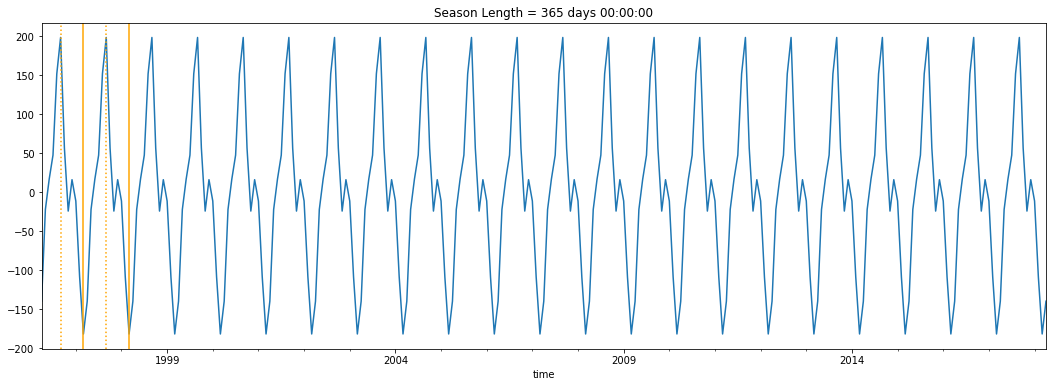

In [247]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95619_values);

# Seasonality does not appear to be a significant factor in this zip code.

In [248]:
ts_95619 = df_sac.loc[df_sac['Zip'] == '95619']  # ts for all of the following functions should have only one zipcode
ts_95619.head()


,Metro,MetroState,CountyName,City,Zip,value
time,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,122400.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121800.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121200.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120700.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120200.0


In [249]:
# ts.head()

ts_95619.head()

,Metro,MetroState,CountyName,City,Zip,value
time,,,,,,
1996-04-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,122400.0
1996-05-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121800.0
1996-06-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,121200.0
1996-07-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120700.0
1996-08-01,Sacramento,Sacramento CA,El Dorado,Diamond Springs,95619,120200.0


In [250]:
# ts = ts.value

ts_95619_values = ts_95619.value

In [251]:
# ts.head()

ts_95619_values.head()

time
1996-04-01    122400.0
1996-05-01    121800.0
1996-06-01    121200.0
1996-07-01    120700.0
1996-08-01    120200.0
Name: value, dtype: float64

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95619_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [253]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(2, 1, 2) MSE=1084744.932

model_fit_95619 = arima_zipcode(ts_95619, order = (2,1,2))


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2074.470
Method:                       css-mle   S.D. of innovations            619.869
Date:                Sat, 14 Mar 2020   AIC                           4160.940
Time:                        18:54:34   BIC                           4182.396
Sample:                    05-01-1996   HQIC                          4169.562
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           752.6516    701.630      1.073      0.284    -622.518    2127.821
ar.L1.D.value     0.2992      0.066      4.505      0.000       0.169       0.429
ar.L2.D.value     0.5239      0.066     

In [261]:
model_fit_95619.forecast(24)

(array([323941.32620535, 326351.73163503, 328694.63587584, 330791.58258218,
        332779.57686675, 334606.11508162, 336327.26638031, 337932.29916728,
        339447.37759531, 340874.70738836, 342228.65602492, 343514.67770993,
        344741.9314927 , 345916.01516284, 347043.40200352, 348128.9614733 ,
        349177.54185762, 350193.14485435, 351179.50777767, 352139.84530868,
        353077.07724948, 353993.76136674, 354892.19262083, 355774.39767053]),
 array([  619.86884619,  1859.8092769 ,  3470.71847751,  5203.08945879,
         7062.73332149,  8976.76432596, 10933.02684515, 12902.24077475,
        14873.9231942 , 16834.41378929, 18776.86014438, 20694.47468014,
        22583.31862073, 24440.08329009, 26262.81684727, 28050.13209546,
        29801.35319487, 31516.20165156, 33194.79198111, 34837.49107208,
        36444.88458762, 38017.70607071, 39556.80570851, 41063.1111798 ]),
 array([[322726.40559167, 325156.24681903],
        [322706.57243419, 329996.89083587],
        [321892.1526

## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
def forecast(model_fit, months=24, confint=2):
    '''From Helper_functions python file'''
    forecast = model_fit.forecast(months)
    actual_forecast = forecast[0]
    std_error = forecast[1]
    forecast_confint = forecast[confint]
    return actual_forecast, std_error, forecast_confint   

actual_forecast_95619, std_error_95619, forecast_confint_95619 = forecast(model_fit_95619)

# actual_forecast, forecast_confint = forecast(model_fit_dallas, months=24, confint=2)

In [ ]:
actual_forecast_95619, std_error_95619, forecast_confint_95619

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95619 = forecast_df(actual_forecast_95619, forecast_confint_95619, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95619 = concat_values_forecast(ts_95619_values, df_forecast_95619)

In [ ]:
df_new_95619.head()

In [ ]:
df_new_95619.tail()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95619, forecasted_lower_95619, forecasted_upper_95619 = forecast_values(df_new_95619)

In [ ]:
forecasted_price_95619, forecasted_lower_95619, forecasted_upper_95619  # predicted, best-case, and worst-case prices in 2020

In [ ]:
last_value_95619 = df_new_95619['value'].loc['2018-04-01']

In [ ]:
last_value_95619

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95619, figsize=(12,8), geog='95619 (Diamond Springs)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
diamond_springs_95619_pred, diamond_springs_95619_low, diamond_springs_95619_high = pred_best_worst(pred=forecasted_price_95619, low=forecasted_lower_95619, high=forecasted_upper_95619, last=last_value_95619, date='April 1, 2020')
diamond_springs_95619_pred, diamond_springs_95619_low, diamond_springs_95619_high

## Recommendation--Zip code 95619:  potential investment candidate

By the model prediction, I would expect to see a 10.799% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -14.266% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 35.863% change in price by April 1, 2020.



# SacMetro: 95864 (Arden-Arcade) -- Don't invest

In [ ]:
# df_geog = df_geog(df=df_metro_cities, col = 'MetroState', geog = 'New York NY')

ts_95864 = df_sac.loc[df_sac['Zip'] == '95864']  # ts for all of the following functions should have only one zipcode
ts_95864.head()


In [ ]:
# ts.head()

ts_95864.tail()

In [ ]:
# ts = ts.value

ts_95864_values = ts_95864.value

In [ ]:
# ts.head()

ts_95864_values.head()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95864'])  # enter desired zip code(s)

#### Boxplot of zip codes by city in a metro area

In [ ]:
ts_95864.boxplot(column = 'value')
plt.title('95864');


### Plot ACF and PACF for ts dataframe

In [ ]:
# note that ts must only contain values and time as index

# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95864_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95864_values)


## ARIMA model parameters and optimization

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95864_values, p_values, d_values, q_values)  # don't run this until you have some time, since it take time

### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 1, 1) MSE=1137443.820

model_fit_95864 = arima_zipcode(ts_95864_values, order = (4,1,1))

## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95864, std_error_95864, forecast_confint_95864 = forecast(model_fit_95864)

# actual_forecast, forecast_confint = forecast(model_fit_dallas, months=24, confint=2)

In [ ]:
actual_forecast_95864, std_error_95864, forecast_confint_95864

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95864 = forecast_df(actual_forecast_95864, forecast_confint_95864, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95864 = concat_values_forecast(ts_95864_values, df_forecast_95864)

In [ ]:
df_new_95864.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95864, forecasted_lower_95864, forecasted_upper_95864 = forecast_values(df_new_95864)

In [ ]:
forecasted_price_95864, forecasted_lower_95864, forecasted_upper_95864  # predicted, best-case, and worst-case prices in 2020

In [ ]:
last_value_95864 = df_new_95864['value'].loc['2018-04-01']

In [ ]:
last_value_95864

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95864, figsize=(12,8), geog='95864 (Arden-Arcade)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
arden_95864_pred, arden_95864_low, arden_95864_high  = pred_best_worst(pred=forecasted_price_95864, low=forecasted_lower_95864, high=forecasted_upper_95864, last=last_value_95864, date='April 1, 2020')
arden_95864_pred, arden_95864_low, arden_95864_high

## Recommendation for ZIP code 95864:  Don't invest

By the model prediction, I would expect to see a -4.669% change in price by April 1, 2020. 
At the lower bound of the confidence interval, I would expect to see a -26.572% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 17.233% change in price by April 1, 2020.

# SacMetro:  95831 (Sacramento) -- Don't invest; lots of downside risk

In [ ]:
geog_area = '95831'

### Create dataframe containing values for just this geographic unit

In [ ]:
ts_95831 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95831.head()


In [ ]:
# ts.head()

ts_95831.head()

In [ ]:
# ts = ts.value

ts_95831_values = ts_95831.value

In [ ]:
# ts.head()

ts_95831_values.head()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95831'])  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
# # note--check for SizeRank column and drop if needed
ts_95831.boxplot(column = 'value')
plt.title('95831');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95831_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95831_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95831_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 0, 2) MSE=955633.913

model_fit_95831 = arima_zipcode(ts_95831_values, order = (6,0,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95831, std_error_95831, forecast_confint_95831 = forecast(model_fit_95831)

# actual_forecast, forecast_confint = forecast(model_fit_dallas, months=24, confint=2)

In [ ]:
actual_forecast_95831, std_error_95831, forecast_confint_95831

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95831 = forecast_df(actual_forecast_95831, forecast_confint_95831, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95831 = concat_values_forecast(ts_95831_values, df_forecast_95831)

In [ ]:
df_new_95831.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95831, forecasted_lower_95831, forecasted_upper_95831 = forecast_values(df_new_95831)

In [ ]:
forecasted_price_95831, forecasted_lower_95831, forecasted_upper_95831  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95831 = df_new_95831['value'].loc['2018-04-01']

In [ ]:
last_value_95831

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95831, figsize=(12,8), geog='95831 (Sacramento)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
sac_pocket_95831_pred, sac_pocket_95831_low, sac_pocket_95831_high = pred_best_worst(pred=forecasted_price_95831, low=forecasted_lower_95831, high=forecasted_upper_95831, last=last_value_95831, date='April 1, 2020')
sac_pocket_95831_pred, sac_pocket_95831_low, sac_pocket_95831_high

## Zip code 95831:  don't invest; lots of downside risk

By the model prediction, I would expect to see a -13.413% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -32.77% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 5.945% change in price by April 1, 2020.

# SacMetro:  96142 (Tahoma) -- Potentially solid gains

In [ ]:
geog_area = '96142'

In [ ]:
ts_96142 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_96142.head()


In [ ]:
# ts.head()

ts_96142.head()

In [ ]:
# ts = ts.value

ts_96142_values = ts_96142.value

In [ ]:
# ts.head()

ts_96142_values.head()

In [ ]:
ts_96142_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['96142'])  # enter desired zip code(s)

In [ ]:
ts_96142.head()

#### Boxplot of zip code

In [ ]:
ts_96142.boxplot(column = 'value')
plt.title('96142');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_96142_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_96142_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_96142_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 1, 2) MSE=10423029.066

model_fit_96142 = arima_zipcode(ts_96142_values, order = (6,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_96142, std_error_96142, forecast_confint_96142 = forecast(model_fit_96142)

In [ ]:
actual_forecast_96142, std_error_96142, forecast_confint_96142

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_96142 = forecast_df(actual_forecast_96142, forecast_confint_96142, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_96142 = concat_values_forecast(ts_96142_values, df_forecast_96142)

In [ ]:
df_new_96142.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_96142, forecasted_lower_96142, forecasted_upper_96142 = forecast_values(df_new_96142)

In [ ]:
forecasted_price_96142, forecasted_lower_96142, forecasted_upper_96142  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_96142 = df_new_96142['value'].loc['2018-04-01']

In [ ]:
last_value_96142

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_96142, figsize=(12,8), geog='96142 (Tahoma)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
tahoma_96142_pred, tahoma_96142_low, tahoma_96142_high = pred_best_worst(pred=forecasted_price_96142, low=forecasted_lower_96142, high=forecasted_upper_96142, last=last_value_96142, date='April 1, 2020')
tahoma_96142_pred, tahoma_96142_low, tahoma_96142_high

## Zip code 96142:  Potentially solid gains, with possibly large upside or downside

By the model prediction, I would expect to see a 9.791% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -15.663% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 35.246% change in price by April 1, 2020.


# SacMetro:  95811 (Sacramento) -- Mediocre predicted returns

In [ ]:
geog_area = '95811'

### Create dataframe containing values for just this geographic unit

In [ ]:
ts_95811 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95811.head()


In [ ]:
# ts.head()

ts_95811.head()

In [ ]:
# ts = ts.value

ts_95811_values = ts_95811.value

In [ ]:
# ts.head()

ts_95811_values.head()

In [ ]:
ts_95811_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95811'], figsize=(12,5))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
# # note--check for SizeRank column and drop if needed

ts_95811.boxplot(column = 'value')
plt.title('95811');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95811_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95811_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95811_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 1, 2) MSE=3195605.437

model_fit_95811 = arima_zipcode(ts_95811_values, order = (4,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
# def forecast(model_fit, months=24, confint=2):
#     forecast = model_fit.forecast(months)
#     actual_forecast = forecast[0]
#     std_error = forecast[1]
#     forecast_confint = forecast[confint]
#     return actual_forecast, std_error, forecast_confint  

# actual_forecast, forecast_confint = forecast(model_fit, months=24, confint=2)

actual_forecast_95811, std_error_95811, forecast_confint_95811 = forecast(model_fit_95811)


In [ ]:
actual_forecast_95811, std_error_95811, forecast_confint_95811

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95811 = forecast_df(actual_forecast_95811, forecast_confint_95811, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95811 = concat_values_forecast(ts_95811_values, df_forecast_95811)

In [ ]:
df_new_95811.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95811, forecasted_lower_95811, forecasted_upper_95811 = forecast_values(df_new_95811)

In [ ]:
forecasted_price_95811, forecasted_lower_95811, forecasted_upper_95811  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95811 = df_new_95811['value'].loc['2018-04-01']

In [ ]:
last_value_95811

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95811, figsize=(12,8), geog='95811 (Sacramento)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
sac_95811_pred, sac_95811_low, sac_95811_high = pred_best_worst(pred=forecasted_price_95811, low=forecasted_lower_95811, high=forecasted_upper_95811, last=last_value_95811, date='April 1, 2020')
sac_95811_pred, sac_95811_low, sac_95811_high

## Zip code 95811:  Don't invest--mediocre predicted returns with significant potential downside (but also significant potential upside)

By the model prediction, I would expect to see a 2.254% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -17.073% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 21.582% change in price by April 1, 2020.

# SacMetro:  95818 (Sacramento) -- Do not invest

In [ ]:
geog_area = '95818'

In [ ]:
ts_95818 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95818.head()


In [ ]:
# ts.head()

ts_95818.head()

In [ ]:
# ts = ts.value

ts_95818_values = ts_95818.value

In [ ]:
# ts.head()

ts_95818_values.head()

In [ ]:
ts_95818_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95818'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
# # note--check for SizeRank column and drop if needed

# fig = plt.figure(figsize=(18, 30))

# for i, zc in enumerate(sac_metro_zips[:48], start=1):
#     ax = fig.add_subplot(8,6,i)
#     ts = df_sac.loc[df_sac['Zip'] == zc]
#     ts.boxplot(column = 'value', ax = ax)
#     ax.set_title(f'{zc}')
#     fig.tight_layout()

ts_95818.boxplot(column = 'value')
plt.title('95818');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95818_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95818_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95818_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 2, 2) MSE=2089095.204

model_fit_95818 = arima_zipcode(ts_95818_values, order = (6,2,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95818, std_error_95818, forecast_confint_95818 = forecast(model_fit_95818)


In [ ]:
actual_forecast_95818, std_error_95818, forecast_confint_95818

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95818 = forecast_df(actual_forecast_95818, forecast_confint_95818, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95818 = concat_values_forecast(ts_95818_values, df_forecast_95818)

In [ ]:
df_new_95818.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95818, forecasted_lower_95818, forecasted_upper_95818 = forecast_values(df_new_95818)

In [ ]:
forecasted_price_95818, forecasted_lower_95818, forecasted_upper_95818  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95818 = df_new_95818['value'].loc['2018-04-01']

In [ ]:
last_value_95818

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95818, figsize=(12,8), geog='95818')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
sac_95818_pred, sac_95818_low, sac_95818_high = pred_best_worst(pred=forecasted_price_95818, low=forecasted_lower_95818, 
                                                                high=forecasted_upper_95818, last=last_value_95818, 
                                                                date='April 1, 2020')
sac_95818_pred, sac_95818_low, sac_95818_high

## Zip code 95818:  Do not invest--negative predicted return

By the model prediction, I would expect to see a -0.978% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -25.772% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 23.816% change in price by April 1, 2020


# SacMetro:  95630 (Folsom)--Mediocre predicted returns 

In [ ]:
geog_area = '95630'

In [ ]:
ts_95630 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95630.head()


In [ ]:
# ts.head()

ts_95630.head()

In [ ]:
# ts = ts.value

ts_95630_values = ts_95630.value

In [ ]:
# ts.head()

ts_95630_values.head()

In [ ]:
ts_95630_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95630'], figsize=(12,6))  # enter desired zip code(s)

In [ ]:
ts_95630.head(3)

#### Boxplot of zip code

In [ ]:
ts_95630.boxplot(column = 'value')
plt.title('95630');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95630_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95630_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95630_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(2, 2, 0) MSE=1373937.757

model_fit_95630 = arima_zipcode(ts_95630_values, order = (2,2,0))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
# actual_forecast, forecast_confint = forecast(model_fit, months=24, confint=2)

actual_forecast_95630, std_error_95630, forecast_confint_95630 = forecast(model_fit_95630)


In [ ]:
actual_forecast_95630, std_error_95630, forecast_confint_95630

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95630 = forecast_df(actual_forecast_95630, forecast_confint_95630, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95630 = concat_values_forecast(ts_95630_values, df_forecast_95630)

In [ ]:
df_new_95630.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95630, forecasted_lower_95630, forecasted_upper_95630 = forecast_values(df_new_95630)

In [ ]:
forecasted_price_95630, forecasted_lower_95630, forecasted_upper_95630  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95630 = df_new_95630['value'].loc['2018-04-01']

In [ ]:
last_value_95630

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95630, figsize=(12,8), geog='95630 (Folsom)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
folsom_95630_pred, folsom_95630_low, folsom_95630_high = pred_best_worst(pred=forecasted_price_95630, low=forecasted_lower_95630, 
                                                                         high=forecasted_upper_95630, last=last_value_95630, date='April 1, 2020')
folsom_95630_pred, folsom_95630_low, folsom_95630_high

## Zip code 95630:  Mediocre earning potential, significant downside risk (but equally possible upside risk)

By the model prediction, I would expect to see a 0.538% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -21.171% change in price by April 1, 2020. 
At the upper bound of the confidence interval, I would expect to see a 22.247% change in price by April 1, 2020. 


# SacMetro:  96140 (Carnelian Bay) -- Definite investment opportunity¶

In [ ]:
geog_area = '96140'

In [ ]:
ts_96140 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_96140.head()


In [ ]:
# ts.head()

ts_96140.head()

In [ ]:
# ts = ts.value

ts_96140_values = ts_96140.value

In [ ]:
# ts.head()

ts_96140_values.head()

In [ ]:
ts_96140_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['96140'], figsize=(12,6))  # enter desired zip code(s)

In [ ]:
ts_96140.head(3)

#### Boxplot of zip code

In [ ]:
ts_96140.boxplot(column = 'value')
plt.title('96140:  Carnelian Bay');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_96140_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_96140_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_96140_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 2, 1) MSE=3386317.647

model_fit_96140 = arima_zipcode(ts_96140_values, order = (4,2,1))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_96140, std_error_96140, forecast_confint_96140 = forecast(model_fit_96140)

In [ ]:
actual_forecast_96140, std_error_96140, forecast_confint_96140

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_96140 = forecast_df(actual_forecast_96140, forecast_confint_96140, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_96140 = concat_values_forecast(ts_96140_values, df_forecast_96140)

In [ ]:
df_new_96140.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_96140, forecasted_lower_96140, forecasted_upper_96140 = forecast_values(df_new_96140)

In [ ]:
forecasted_price_96140, forecasted_lower_96140, forecasted_upper_96140  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_96140 = df_new_96140['value'].loc['2018-04-01']

In [ ]:
last_value_96140

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_96140, figsize=(12,8), geog='96140:  Carnelian Bay')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
cb_96140_pred, cb_96140_low, cb_96140_high = pred_best_worst(pred=forecasted_price_96140, low=forecasted_lower_96140, high=forecasted_upper_96140, last=last_value_96140, date='April 1, 2020')
cb_96140_pred, cb_96140_low, cb_96140_high

## Zip code 96140:  Definite investment opportunity with potentially large upside returns

By the model prediction, I would expect to see a 19.421% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -19.639% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 58.48% change in price by April 1, 2020


# SacMetro:  95672 (Rescue) -- Solid investment opportunity 

In [ ]:
geog_area = '95672'

In [ ]:
ts_95672 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95672.head()


In [ ]:
# ts.head()

ts_95672.head()

In [ ]:
# ts = ts.value

ts_95672_values = ts_95672.value

In [ ]:
# ts.head()

ts_95672_values.head()

In [ ]:
ts_95672_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95672'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95672.boxplot(column = 'value')
plt.title('95672');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95672_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95672_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95672_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(8, 2, 0) MSE=3175806.269

model_fit_95672 = arima_zipcode(ts_95672_values, order = (8,2,0))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
# actual_forecast, forecast_confint = forecast(model_fit, months=24, confint=2)

actual_forecast_95672, std_error_95672, forecast_confint_95672 = forecast(model_fit_95672)


In [ ]:
actual_forecast_95672, std_error_95672, forecast_confint_95672

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95672 = forecast_df(actual_forecast_95672, forecast_confint_95672, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95672 = concat_values_forecast(ts_95672_values, df_forecast_95672)

In [ ]:
df_new_95672.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95672, forecasted_lower_95672, forecasted_upper_95672 = forecast_values(df_new_95672)

In [ ]:
forecasted_price_95672, forecasted_lower_95672, forecasted_upper_95672  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95672 = df_new_95672['value'].loc['2018-04-01']

In [ ]:
last_value_95672

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95672, figsize=(12,8), geog='95672 (Rescue)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
rescue_95672_pred, rescue_95672_low, rescue_95672_high = pred_best_worst(pred=forecasted_price_95672, low=forecasted_lower_95672, 
                                                                         high=forecasted_upper_95672, last=last_value_95672, date='April 1, 2020')
rescue_95672_pred, rescue_95672_low, rescue_95672_high

## Zip code 95672 (Rescue):  Good investment opportunity

By the model prediction, I would expect to see a 32.296% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -2.975% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 67.567% change in price by April 1, 2020



# SacMetro:  95636 (Somerset) -- Potential investment opportunity

In [ ]:
geog_area = '95636'

In [ ]:
ts_95636 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95636.head()


In [ ]:
# ts.head()

ts_95636.head()

In [ ]:
# ts = ts.value

ts_95636_values = ts_95636.value

In [ ]:
# ts.head()

ts_95636_values.head()

In [ ]:
ts_95636_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95636'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95636.boxplot(column = 'value')
plt.title('95636');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95636_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95636_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95636_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(8, 2, 1) MSE=1389280.792

model_fit_95636 = arima_zipcode(ts_95636_values, order = (8,2,1))

## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95636, std_error_95636, forecast_confint_95636 = forecast(model_fit_95636)

# actual_forecast, forecast_confint = forecast(model_fit_dallas, months=24, confint=2)

In [ ]:
actual_forecast_95636, std_error_95636, forecast_confint_95636

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95636 = forecast_df(actual_forecast_95636, forecast_confint_95636, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95636 = concat_values_forecast(ts_95636_values, df_forecast_95636)

In [ ]:
df_new_95636.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95636, forecasted_lower_95636, forecasted_upper_95636 = forecast_values(df_new_95636)

In [ ]:
forecasted_price_95636, forecasted_lower_95636, forecasted_upper_95636  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95636 = df_new_95636['value'].loc['2018-04-01']

In [ ]:
last_value_95636

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95636, figsize=(12,8), geog='95636 (Somerset)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
somerset_95636_pred, somerset_95636_low, somerset_95636_high = pred_best_worst(pred=forecasted_price_95636, low=forecasted_lower_95636, 
                                                                               high=forecasted_upper_95636, last=last_value_95636, date='April 1, 2020')
somerset_95636_pred, somerset_95636_low, somerset_95636_high 

## Zip code 95636:  Good return predicted, but has very large potential downside (as well as large potential upside)

By the model prediction, I would expect to see a 11.207% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -38.231% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 60.646% change in price by April 1, 2020




# SacMetro:  95709 (Camino) -- Don't invest

In [ ]:
geog_area = '95709'

In [ ]:
ts_95709 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95709.head()


In [ ]:
# ts.head()

ts_95709.tail()

In [ ]:
# ts = ts.value

ts_95709_values = ts_95709.value

In [ ]:
# ts.head()

ts_95709_values.head()

In [ ]:
ts_95709_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95709'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95709.boxplot(column = 'value')
plt.title('95709');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95709_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95709_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95709_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(8, 0, 2) MSE=717546.010
model_fit_95709 = arima_zipcode(ts_95709_values, order = (8, 0, 2))

## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95709, std_error_95709, forecast_confint_95709 = forecast(model_fit_95709)

In [ ]:
actual_forecast_95709, std_error_95709, forecast_confint_95709

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95709 = forecast_df(actual_forecast_95709, forecast_confint_95709, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95709 = concat_values_forecast(ts_95709_values, df_forecast_95709)

In [ ]:
df_new_95709.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95709, forecasted_lower_95709, forecasted_upper_95709 = forecast_values(df_new_95709)

In [ ]:
forecasted_price_95709, forecasted_lower_95709, forecasted_upper_95709  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95709 = df_new_95709['value'].loc['2018-04-01']

In [ ]:
last_value_95709

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95709, figsize=(12,8), geog='95709 (Camino)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
camino_95709_pred, camino_95709_low, camino_95709_high  = pred_best_worst(pred=forecasted_price_95709, low=forecasted_lower_95709, 
                                                                          high=forecasted_upper_95709, last=last_value_95709, date='April 1, 2020')
camino_95709_pred, camino_95709_low, camino_95709_high

## Zip code 95709 (Camino):  Don't invest

By the model prediction, I would expect to see a -0.349% change in price by April 1, 2020
At the lower bound of the confidence interval, I would expect to see a -21.147% change in price by April 1, 2020
At the upper bound of the confidence interval, I would expect to see a 20.448% change in price by April 1, 2020


# SacMetro:  95746 (Granite Bay) -- Solid investment opportunity

In [ ]:
geog_area = '95746'

In [ ]:
ts_95746 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95746.head()


In [ ]:
# ts.head()

ts_95746.tail()

In [ ]:
# ts = ts.value

ts_95746_values = ts_95746.value

In [ ]:
# ts.head()

ts_95746_values.head()

In [ ]:
ts_95746_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95746'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95746.boxplot(column = 'value')
plt.title('95746');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95746_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95746_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95746_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 1, 2) MSE=3329403.484

model_fit_95746 = arima_zipcode(ts_95746_values, order = (6, 1, 2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95746, std_error_95746, forecast_confint_95746 = forecast(model_fit_95746)

In [ ]:
actual_forecast_95746, std_error_95746, forecast_confint_95746

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95746 = forecast_df(actual_forecast_95746, forecast_confint_95746, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95746 = concat_values_forecast(ts_95746_values, df_forecast_95746)

In [ ]:
df_new_95746.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95746, forecasted_lower_95746, forecasted_upper_95746 = forecast_values(df_new_95746)

In [ ]:
forecasted_price_95746, forecasted_lower_95746, forecasted_upper_95746  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95746 = df_new_95746['value'].loc['2018-04-01']

In [ ]:
last_value_95746

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95746, figsize=(12,8), geog='95746 (Granite Bay)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
gb_95746_pred, gb_95746_low, gb_95746_high = pred_best_worst(pred=forecasted_price_95746, low=forecasted_lower_95746, 
                                                             high=forecasted_upper_95746, last=last_value_95746, date='April 1, 2020')
gb_95746_pred, gb_95746_low, gb_95746_high

## Zip code 95746 (Granite Bay):  Solid investment opportunity

By the model prediction, I would expect to see a 7.906% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -9.561% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 25.374% change in price by April 1, 2020.

# SacMetro:  95614 (Cool) -- Not a great investment opportunity

In [ ]:
geog_area = '95614'

In [ ]:
ts_95614 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95614.head()


In [ ]:
# ts.head()

ts_95614.tail()

In [ ]:
# ts = ts.value

ts_95614_values = ts_95614.value

In [ ]:
# ts.head()

ts_95614_values.head()

In [ ]:
ts_95614_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95614'], nrows=1, ncols=1, figsize=(10,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95614.boxplot(column = 'value')
plt.title('95614');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95614_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95614_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95614_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(8, 0, 2) MSE=1365126.920

model_fit_95614 = arima_zipcode(ts_95614_values, order = (8,0,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95614, std_error_95614, forecast_confint_95614 = forecast(model_fit_95614)


In [ ]:
actual_forecast_95614, std_error_95614, forecast_confint_95614

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95614 = forecast_df(actual_forecast_95614, forecast_confint_95614, 
                                col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95614 = concat_values_forecast(ts_95614_values, df_forecast_95614)

In [ ]:
df_new_95614.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95614, forecasted_lower_95614, forecasted_upper_95614 = forecast_values(df_new_95614)

In [ ]:
forecasted_price_95614, forecasted_lower_95614, forecasted_upper_95614  # predicted, best-case, and worst-case prices in 2020

In [ ]:
last_value_95614 = df_new_95614['value'].loc['2018-04-01']

In [ ]:
last_value_95614

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95614, figsize=(12,8), geog='95614 (Cool)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
cool_95614_pred, cool_95614_low, cool_95614_high = pred_best_worst(pred=forecasted_price_95614, low=forecasted_lower_95614, 
                                                                   high=forecasted_upper_95614, last=last_value_95614, date='April 1, 2020')
cool_95614_pred, cool_95614_low, cool_95614_high 

## Zip code 95614 (Cool):  Not a great investment opportunity

By the model prediction, I would expect to see a 2.466% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -18.714% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 23.646% change in price by April 1, 2020.


# SacMetro:  95663 (Penryn) -- Excellent investment opportunity

In [ ]:
geog_area = '95663'

In [ ]:
ts_95663 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95663.head()


In [ ]:
# ts.head()

ts_95663.tail()

In [ ]:
# ts = ts.value

ts_95663_values = ts_95663.value

In [ ]:
# ts.head()

ts_95663_values.head()

In [ ]:
ts_95663_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95663'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95663.boxplot(column = 'value')
plt.title('95663');

### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95663_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95663_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95663_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 1, 1) MSE=4616814.652

model_fit_95663 = arima_zipcode(ts_95663_values, order = (6, 1, 1))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95663, std_error_95663, forecast_confint_95663 = forecast(model_fit_95663)


In [ ]:
actual_forecast_95663, std_error_95663, forecast_confint_95663

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95663 = forecast_df(actual_forecast_95663, forecast_confint_95663, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95663 = concat_values_forecast(ts_95663_values, df_forecast_95663)

In [ ]:
df_new_95663.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95663, forecasted_lower_95663, forecasted_upper_95663 = forecast_values(df_new_95663)

In [ ]:
forecasted_price_95663, forecasted_lower_95663, forecasted_upper_95663  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95663 = df_new_95663['value'].loc['2018-04-01']

In [ ]:
last_value_95663

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95663, figsize=(12,8), geog='95663 (Penryn)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
penryn_95663_pred, penryn_95663_low, penryn_95663_high = pred_best_worst(pred=forecasted_price_95663, low=forecasted_lower_95663, 
                                                                         high=forecasted_upper_95663, last=last_value_95663, date='April 1, 2020')
penryn_95663_pred, penryn_95663_low, penryn_95663_high

## Zip code 95663 (Penryn):  Excellent investment opportunity

By the model prediction, I would expect to see a 13.679% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -8.334% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 35.692% change in price by April 1, 2020.

# SacMetro:  95623 (El Dorado) -- Good investment opportunity

In [ ]:
geog_area = '95623'

In [ ]:
ts_95623 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95623.head()


In [ ]:
ts_95623.tail()

In [ ]:
# ts = ts.value

ts_95623_values = ts_95623.value

In [ ]:
# ts.head()

ts_95623_values.head()

In [ ]:
ts_95623_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95623'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95623.boxplot(column = 'value')
plt.title('95623');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95623_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95623_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95623_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(6, 1, 2) MSE=2032900.464

model_fit_95623 = arima_zipcode(ts_95623_values, order = (6,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95623, std_error_95623, forecast_confint_95623 = forecast(model_fit_95623)


In [ ]:
actual_forecast_95623, std_error_95623, forecast_confint_95623

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95623 = forecast_df(actual_forecast_95623, forecast_confint_95623, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95623 = concat_values_forecast(ts_95623_values, df_forecast_95623)

In [ ]:
df_new_95623

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95623, forecasted_lower_95623, forecasted_upper_95623 = forecast_values(df_new_95623)

In [ ]:
forecasted_price_95623, forecasted_lower_95623, forecasted_upper_95623  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95623 = df_new_95623['value'].loc['2018-04-01']

In [ ]:
last_value_95623

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95623, figsize=(12,8), geog='95623 (El Dorado)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
eldorado_95623_pred, eldorado_95623_low, eldorado_95623_high = pred_best_worst(pred=forecasted_price_95623, low=forecasted_lower_95623, 
                                                                               high=forecasted_upper_95623, last=last_value_95623, date='April 1, 2020')
eldorado_95623_pred, eldorado_95623_low, eldorado_95623_high 

## Zip code 95623 (El Dorado):   Good investment opportunity

By the model prediction, I would expect to see a 8.258% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -14.768% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 31.285% change in price by April 1, 2020.

# SacMetro:  95747 (Roseville) -- Potential investment opportunity with more upside than downside potential

In [ ]:
geog_area = '95747'

In [ ]:
ts_95747 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95747.head()


In [ ]:
ts_95747.tail()

In [ ]:
# ts = ts.value

ts_95747_values = ts_95747.value

In [ ]:
# ts.head()

ts_95747_values.head()

In [ ]:
ts_95747_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95747'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95747.boxplot(column = 'value')
plt.title('95747');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95747_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95747_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95747_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 1, 2) MSE=956941.458

model_fit_95747 = arima_zipcode(ts_95747_values, order = (4,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95747, std_error_95747, forecast_confint_95747 = forecast(model_fit_95747)


In [ ]:
actual_forecast_95747, std_error_95747, forecast_confint_95747

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95747 = forecast_df(actual_forecast_95747, forecast_confint_95747, col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))


### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95747 = concat_values_forecast(ts_95747_values, df_forecast_95747)

In [ ]:
df_new_95747

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95747, forecasted_lower_95747, forecasted_upper_95747 = forecast_values(df_new_95747)

In [ ]:
forecasted_price_95747, forecasted_lower_95747, forecasted_upper_95747  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95747 = df_new_95747['value'].loc['2018-04-01']

In [ ]:
last_value_95747

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95747, figsize=(12,8), geog='95747 (Roseville)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
roseville_95747_pred, roseville_95747_low, roseville_95747_high = pred_best_worst(pred=forecasted_price_95747, low=forecasted_lower_95747, 
                                                                                  high=forecasted_upper_95747, last=last_value_95747, date='April 1, 2020')
roseville_95747_pred, roseville_95747_low, roseville_95747_high 

## Zip code 95747 (Roseville):  Potential opportunity, with mediocre predicted returns but more upside than downside

By the model prediction, I would expect to see a 5.556% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -10.609% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 21.722% change in price by April 1, 2020.

# SacMetro:  95765 (Rocklin) -- Solid investment opportunity with minimal downside risk

In [ ]:
geog_area = '95765'

In [ ]:
ts_95765 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95765.head()


In [ ]:
ts_95765.tail()

In [ ]:
# ts = ts.value

ts_95765_values = ts_95765.value

In [ ]:
ts_95765_values.head()

In [ ]:
ts_95765_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95765'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95765.boxplot(column = 'value')
plt.title('95765');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95765_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95765_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95765_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 1, 2) MSE=958549.703

model_fit_95765 = arima_zipcode(ts_95765_values, order = (4,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95765, std_error_95765, forecast_confint_95765 = forecast(model_fit_95765)


In [ ]:
actual_forecast_95765, std_error_95765, forecast_confint_95765

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95765 = forecast_df(actual_forecast_95765, forecast_confint_95765, col = 'time', 
                                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95765 = concat_values_forecast(ts_95765_values, df_forecast_95765)

In [ ]:
df_new_95765.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95765, forecasted_lower_95765, forecasted_upper_95765 = forecast_values(df_new_95765)

In [ ]:
forecasted_price_95765, forecasted_lower_95765, forecasted_upper_95765  # predicted, best-case, and worst-case prices in 2020

In [ ]:
last_value_95765 = df_new_95765['value'].loc['2018-04-01']

In [ ]:
last_value_95765

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95765, figsize=(12,8), geog='95765 (Rocklin)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
rocklin_95765_pred, rocklin_95765_low, rocklin_95765_high = pred_best_worst(pred=forecasted_price_95765, low=forecasted_lower_95765, 
                                                                            high=forecasted_upper_95765, last=last_value_95765, date='April 1, 2020')
rocklin_95765_pred, rocklin_95765_low, rocklin_95765_high 

## Zip code 95765 (Rocklin):  Solid investment opportunity with minimal downside

By the model prediction, I would expect to see a 11.779% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -8.471% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 32.029% change in price by April 1, 2020.


# SacMetro:  95602 (Auburn) -- Strong investment opportunity with minimal downside

In [ ]:
geog_area = '95602'

In [ ]:
ts_95602 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95602.head()


In [ ]:
ts_95602.tail()

In [ ]:
# ts = ts.value

ts_95602_values = ts_95602.value

In [ ]:
# ts.head()

ts_95602_values.head()

In [ ]:
ts_95602_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95602'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95602.boxplot(column = 'value')
plt.title('95602');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95602_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95602_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95602_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(4, 0, 2) MSE=584168.034

model_fit_95602 = arima_zipcode(ts_95602_values, order = (4,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95602, std_error_95602, forecast_confint_95602 = forecast(model_fit_95602)


In [ ]:
actual_forecast_95602, std_error_95602, forecast_confint_95602

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95602 = forecast_df(actual_forecast_95602, forecast_confint_95602, col = 'time', 
                                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95602 = concat_values_forecast(ts_95602_values, df_forecast_95602)

In [ ]:
df_new_95602.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95602, forecasted_lower_95602, forecasted_upper_95602 = forecast_values(df_new_95602)

In [ ]:
forecasted_price_95602, forecasted_lower_95602, forecasted_upper_95602  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95602 = df_new_95602['value'].loc['2018-04-01']

In [ ]:
last_value_95602

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95602, figsize=(12,8), geog='95602 (Auburn)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
auburn_95602_pred, auburn_95602_low, auburn_95602_high = pred_best_worst(pred=forecasted_price_95602, low=forecasted_lower_95602, 
                                                                         high=forecasted_upper_95602, last=last_value_95602, date='April 1, 2020')
auburn_95602_pred, auburn_95602_low, auburn_95602_high 

## Zip code 95602 (Auburn):  Strong investment opportunity with minimal downside

By the model prediction, I would expect to see a 11.831% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -7.957% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 31.619% change in price by April 1, 2020.

# SacMetro:  96150 (South Lake Tahoe) -- 

In [ ]:
geog_area = '96150'

In [ ]:
ts_96150 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_96150.head()


In [ ]:
ts_96150.tail()

In [ ]:
# ts = ts.value

ts_96150_values = ts_96150.value

In [ ]:
# ts.head()

ts_96150_values.head()

In [ ]:
ts_96150_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['96150'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_96150.boxplot(column = 'value')
plt.title('95602');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_96150_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_96150_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_96150_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(2, 1, 2) MSE=700451.029

model_fit_96150 = arima_zipcode(ts_96150_values, order = (2,1,2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_96150, std_error_96150, forecast_confint_96150 = forecast(model_fit_96150)


In [ ]:
actual_forecast_96150, std_error_96150, forecast_confint_96150

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_96150 = forecast_df(actual_forecast_96150, forecast_confint_96150, col = 'time', 
                                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_96150 = concat_values_forecast(ts_96150_values, df_forecast_96150)

In [ ]:
df_new_96150.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_96150, forecasted_lower_96150, forecasted_upper_96150 = forecast_values(df_new_96150)

In [ ]:
forecasted_price_96150, forecasted_lower_96150, forecasted_upper_96150  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_96150 = df_new_96150['value'].loc['2018-04-01']

In [ ]:
last_value_96150

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_96150, figsize=(12,8), geog='96150 (South Lake Tahoe)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
slt_96150_pred, slt_96150_low, slt_96150_high = pred_best_worst(pred=forecasted_price_96150, low=forecasted_lower_96150, 
                                                                         high=forecasted_upper_96150, last=last_value_96150, date='April 1, 2020')
slt_96150_pred, slt_96150_low, slt_96150_high

## Zip code  (South Lake Tahoe):  Good potential investment opportunity, with some downside but significant potential upside

By the model prediction, I would expect to see a 8.539% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -14.673% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 31.75% change.

# SacMetro:  95650 (Loomis) -- Excellent investment opportunity with limited downside and large potential upside

In [ ]:
geog_area = '95650'

In [ ]:
ts_95650 = df_sac.loc[df_sac['Zip'] == geog_area]  # ts for all of the following functions should have only one zipcode
ts_95650.head()


In [ ]:
ts_95650.tail()

In [ ]:
# ts = ts.value

ts_95650_values = ts_95650.value

In [ ]:
# ts.head()

ts_95650_values.head()

In [ ]:
ts_95650_values.tail()

### Visualizations

#### plot_ts:  Plot zip code(s) of interest over time, with market highs and lows

In [ ]:
# fig, ax = plot_ts(df_melt, zipcodes=['95616', '92008', '90035', '90025', '60625', '57701'])  # enter desired zip code(s)

fig, ax = plot_ts_zips(df_melt, zipcodes=['95650'], figsize=(12,6))  # enter desired zip code(s)

#### Boxplot of zip code

In [ ]:
ts_95650.boxplot(column = 'value')
plt.title('95650');


### Plot ACF and PACF for ts dataframe

In [ ]:
# plot_acf_pacf(ts, figsize=(10,6), lags=15)  # note that ts must only contain values and time as index

plot_acf_pacf(ts_95650_values, figsize=(10,6), lags=15)

### Plot seasonal decomposition for ts dataframe

In [ ]:
# plot_seasonal_decomp(ts)

plot_seasonal_decomp(ts_95650_values)

# Seasonality does not appear to be a significant factor in this zip code.

## ARIMA model parameters and optimization

### Generate list of (p,d,q) and (p,d,q,m) values

In [ ]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

### Run ARIMA model on ts dataframe with list of p,d,q values 

In [ ]:
# eval_arima_models(ts, p_values, d_values, q_values)  # don't run this until you have some time, since it take time
# note that ts must only contain values and time as index

# eval_arima_models(ts_95650_values, p_values, d_values, q_values)  # don't run this until you have some time, since it takes time


### Generate model fit summary

In [ ]:
# model_fit = arima_zipcode(ts, order = None)   # change order = tuple to correspond to the best MSE produced by previous function

# Best ARIMA(8, 1, 2) MSE=3366956.253

model_fit_95650 = arima_zipcode(ts_95650_values, order = (8, 1, 2))


## ARIMA modeling results:  predictions and visualization

### Produce forecasts from ARIMA model fit

In [ ]:
actual_forecast_95650, std_error_95650, forecast_confint_95650 = forecast(model_fit_95650)


In [ ]:
actual_forecast_95650, std_error_95650, forecast_confint_95650

### Create dataframe to hold forecast results

In [ ]:
# df_forecast = forecast_df(col = 'time', daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'), 
#                 actual_forecast=actual_forecast, forecast_confint = forecast_confint)

df_forecast_95650 = forecast_df(actual_forecast_95650, forecast_confint_95650, col = 'time', 
                                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))

### Create new dataframe concatenating historic values and forecast results

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

df_new_95650 = concat_values_forecast(ts_95650_values, df_forecast_95650)

In [ ]:
df_new_95650.head()

### Calculate predicted, lower bound, and upper bound forecasted prices

In [ ]:
forecasted_price_95650, forecasted_lower_95650, forecasted_upper_95650 = forecast_values(df_new_95650)

In [ ]:
forecasted_price_95650, forecasted_lower_95650, forecasted_upper_95650  # predicted, best-case, and worst-case prices in 2020


In [ ]:
last_value_95650 = df_new_95650['value'].loc['2018-04-01']

In [ ]:
last_value_95650

### Plot forecast with confidence intervals

In [ ]:
# plot_forecast(df = df_new, figsize=(12,8), geog=None)

plot_forecast(df_new_95650, figsize=(12,8), geog='95650 (Loomis)')

### Print summary of predicted, worst-case, and best-case scenarios

In [ ]:
loomis_95650_pred, loomis_95650_low, loomis_95650_high = pred_best_worst(pred=forecasted_price_95650, low=forecasted_lower_95650, 
                                                                         high=forecasted_upper_95650, last=last_value_95650, date='April 1, 2020')
loomis_95650_pred, loomis_95650_low, loomis_95650_high

## Zip code 95650 (Loomis):  Excellent investment opportunity with limited downside and large potential upside

By the model prediction, I would expect to see a 12.756% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -8.199% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 33.712% change in price by April 1, 2020.


# Dataframe summarizing findings

In [ ]:
zipcodes = ['95616', '95619', '95864', '95831', '96142', '95811', '95818', '95630', '96140', '95672', '95636', 
            '95709','95746', '95614', '95663', '95623', '95747', '95765', '95602', '96150' , '95650']
len(zipcodes)

In [ ]:
last_value_2018 = [last_value_95616, last_value_95619, last_value_95864, last_value_95831, last_value_96142, last_value_95811,
                  last_value_95818, last_value_95630, last_value_96140, last_value_95672, last_value_95636, last_value_95709,
                  last_value_95746, last_value_95614, last_value_95663, last_value_95623, last_value_95747, last_value_95765, 
                   last_value_95602, last_value_96150, last_value_95650]

In [ ]:
len(last_value_2018)
# last_value_2018

In [ ]:
cities = ['Davis', 'Diamond Springs', 'Arden-Arcade', 'Sacramento_Pocket', 'Tahoma', 'Sacramento_DosRios', 'Sacramento_LandPark', 'Folsom', 
          'Carnelian Bay', 'Rescue', 'Somerset', 'Camino', 'Granite Bay', 'Cool', 'Penryn', 'El Dorado', 
         'Roseville', 'Rocklin', 'Auburn', 'South Lake Tahoe', 'Loomis']
len(cities)
cities

In [ ]:
population = [45500, 4359, 92186, 42952, 1037, 7630, 21825, 74111, 1170, 4592, 1000, 4354, 22482, 3882, 2468, 3986,
             72437, 41810, 18290, 30000, 12600]
len(population)

In [ ]:
county = ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento', 'El Dorado', 'Sacramento', 'Sacramento', 'Sacramento', 
          'Placer', 'El Dorado', 'El Dorado', 'El Dorado', 'Placer', 'El Dorado', 'Placer', 'El Dorado', 
          'Placer', 'Placer', 'Placer', 'El Dorado', 'Placer']
print(len(county))

In [ ]:
invest_rec = ['mediocre','good', 'poor', 'poor', 'good', 'mediocre', 'poor', 'mediocre', 'excellent', 
              'excellent', 'good', 'poor', 'good', 'mediocre', 'excellent', 'good', 'good', 'excellent', 
              'excellent', 'good', 'excellent']
len(invest_rec)

In [ ]:
pred_value_pct_change = [davis_95616_pred, diamond_springs_95619_pred, arden_95864_pred, sac_pocket_95831_pred, tahoma_96142_pred, 
              sac_95811_pred, sac_95818_pred, folsom_95630_pred, cb_96140_pred, rescue_95672_pred, 
              somerset_95636_pred, camino_95709_pred, gb_95746_pred, cool_95614_pred, penryn_95663_pred, 
             eldorado_95623_pred, roseville_95747_pred, rocklin_95765_pred, auburn_95602_pred, slt_96150_pred, loomis_95650_pred]


In [ ]:
len(pred_value_pct_change)

In [ ]:
worst_case_pct_change = [davis_95616_lower, diamond_springs_95619_low, arden_95864_low, sac_pocket_95831_low, tahoma_96142_low, 
              sac_95811_low, sac_95818_low, folsom_95630_low, cb_96140_low, rescue_95672_low, 
              somerset_95636_low, camino_95709_low, gb_95746_low, cool_95614_low, penryn_95663_low, eldorado_95623_low, 
             roseville_95747_low, rocklin_95765_low, auburn_95602_low, slt_96150_low, loomis_95650_low]

In [ ]:
len(worst_case_pct_change)

In [ ]:
best_case_pct_change = [davis_95616_upper, diamond_springs_95619_high, arden_95864_high, sac_pocket_95831_high, tahoma_96142_high, 
             sac_95811_high, sac_95818_high, folsom_95630_high, cb_96140_high, rescue_95672_high, 
             somerset_95636_high, camino_95709_high, gb_95746_high, cool_95614_high, penryn_95663_high, eldorado_95623_high, 
            roseville_95747_high, rocklin_95765_high, auburn_95602_high, slt_96150_high, loomis_95650_high]

In [ ]:
len(best_case_pct_change)

In [ ]:
df_findings = pd.DataFrame({'ZIP code': zipcodes, '2018 value': last_value_2018, 'City': cities, 'Pop': population, 'County': county, 
                            'Investment rating': invest_rec, 'Predicted':pred_value_pct_change, 'Worst Case':worst_case_pct_change, 
                            'Best Case':best_case_pct_change})

In [ ]:
df_findings

In [ ]:
df_findings.set_index('ZIP code', inplace=True)

In [ ]:
df_findings.sort_values(by='Predicted', ascending=False, inplace=True)

In [ ]:
df_findings

## Visualization of semi-finalist ZIP codes

In [ ]:
fig, ax = plot_ts_zips(df_sac, zipcodes, nrows=11, ncols=2, figsize=(18, 50), legend=True)


## Visualization of semi-finalist ZIP codes, labeled with ZIP and city


### Create function to automate plotting of semifinalist ZIP codes with city and ZIP labels

In [ ]:
def zip_semifinalists(df, dict_zip_city, col = 'value', nrows=11, ncols=2, figsize=(18, 40), legend=True):

    fig = plt.figure(figsize=figsize)

    for i, key in enumerate(dict_zip_city.keys(), start=1):
        ax = fig.add_subplot(nrows, ncols, i)   
        ts = df[col].loc[df['Zip'] == dict_zip_city[key]]
        ts = ts.rename(dict_zip_city[key])
        try: 
            max_ = ts.loc['2004':'2011'].idxmax()  
        except:
            continue

        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        val_2003 = ts.loc['2003-01-01']
        ts.plot(ax=ax, fontsize=12)   
        plt.title(f'{key} ({dict_zip_city[key]})', fontsize=16)
        plt.xlabel('')

        ax.axvline(max_, label = 'Maximum value during bubble', color = 'orange', ls=':')               
        ax.axvline(crash, label = 'Housing market declines', color='black')                         
        ax.axvline(min_, label = 'Minimum value after crash', color = 'red', ls=':')
        ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)

        if legend:
            ax.legend(loc='upper left', prop={'size': 10})

        fig.tight_layout()
        
    return fig, ax


In [ ]:
ts = ts.rename('95616')

In [ ]:
ts.plot()
plt.legend()

### Create dictionary of each ZIP code and the city to which it belongs



In [ ]:
dict_semifinal_city_zip = dict(zip(cities, zipcodes))

In [ ]:
dict_semifinal_city_zip

In [ ]:
dict_semifinal_city_zip = dict(sorted(dict_semifinal_city_zip.items()))

In [ ]:
dict_semifinal_city_zip

In [ ]:
len(dict_semifinal_city_zip)

### Run function to generate plots for all ZIP codes

In [ ]:
zip_semifinalists(df_sac, dict_semifinal_city_zip, col = 'value', nrows=11, ncols=2, figsize=(18, 40), legend=True);

## Create 6 ZIP plots at one time (PowerPoint-friendlier format)

### Need to first create subset dictionaries to plot over

In [ ]:
def return_slice(dictionary, m, n):
    sub_dict = {k: dictionary[k] for k in list(dictionary)[m:n]}
    return sub_dict


In [ ]:
dict_semi_0_6 = return_slice(dict_semifinal_city_zip, 0, 6)
dict_semi_0_6

In [ ]:
dict_semi_6_12 = return_slice(dict_semifinal_city_zip, 6, 12)
dict_semi_6_12

In [ ]:
dict_semi_12_18 = return_slice(dict_semifinal_city_zip, 12, 18)
dict_semi_12_18

In [ ]:
dict_semi_18_21 = return_slice(dict_semifinal_city_zip, 18, 21)
dict_semi_18_21

### Run function on subset dictionaries

In [ ]:
zip_semifinalists(df_sac, dict_semi_0_6, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

In [ ]:
zip_semifinalists(df_sac, dict_semi_6_12, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

In [ ]:
zip_semifinalists(df_sac, dict_semi_12_18, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

In [ ]:
zip_semifinalists(df_sac, dict_semi_18_21, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

# Recommended ZIP Codes

## Decision-making process

*First,* I sorted ZIP codes based on __predicted return__.  This is how the summary table is sorted.  

*Second,* I considered the potential __worst-case valuation scenario__.  
- There are a few ZIP codes that have relatively good predicted valuations over the two-year time horizon, but also have substantial potential downside.  Examples include Carnelian Bay, Somerset, Diamond Springs, Tahoma, El Dorado, and Roseville.  
- Because of the significant possible downsides of these ZIP codes, I put them in the 'maybe' column.  I subsequently removed them after the considerations below.

*Third,* I reviewed the potential __best-case valuation scenario,__ just to see how much potential upside the ZIP code could yield.  
- Since time series predictions are so uncertain--as illustrated by the large differences between the upper bound and lower bound values--I don't put much weight on the upper end of potential yields.  
- Predicted values as well as downside risk are more important, but looking at the best-case scenario can suggest whether a higher return is more likely.  

*Finally,* I looked at the __population__ in each ZIP code, as well as the __geographic location__ of the ZIP code.  Doing this caused me to modify my initial assessment (and prompted me to analyze more ZIP codes).  
- Several of the "maybe"s on the chart are for very small towns clustered around Lake Tahoe.  I would recommend against selecting more than one of these ZIP codes for the top 5.  
   - For one thing, the towns are very small, so the pool of potential investment opportunities in each is small. 
   - For another thing, many of the homes in these towns are vacation homes, so a significant economic downturn could cause a significant drop in prices.  
   - Third, the region's economy is based almost entirely on tourism (especially skiing in the winter and water sports in the summer).  Economic downturns could depress housing values in the near term, while larger trends such as climate change may have a significant long-term effect (e.g., less natural snowpack in the winter). 


## Top 5 ZIP codes the Sacramento Metro region:

1.  *Rescue, CA (95672).*  While the population is fairly small, average home values are high.  Home values for the ZIP code in 4/1/2020 are forecasted to be ___32% higher___ than they are now.  Furthermore, the downside is very limited (~3%) and the upside is potentially large (68%).

2.  *Penryn, CA (95663).*  The population here is small, but average home values are even higher than Rescue.  While Rescue is in El Dorado County, Penryn is in Placer County, offering a bit of geographic diversity.  Penryn's home values are predicted to rise ___almost 14% higher___ by 4/1/2020.  Downside is limited (8.3% at the lower bound) and upside is potentially substantial (over 35%).  

3.  *Auburn, CA (95602).* Auburn's population is significantly larger than the first two, offering additional investment opportunities and stablity within one ZIP code.  Its location in the foothills of the Sierra Nevada is desireable for many homebuyers, as evidenced by the average home value.  Home values are predicted to ___increase 11.8%___ over 24 months, with minimal downside (-8% at the lower bound) and substantial potential upside (31.6%).

4.  *Rocklin, CA (95765).*  This ZIP code's population (almost 42,000) is larger than Auburn, Rescue, and Penryn put together, and so offers a wider range of opportunities, both expensive and affordable.  The model predicts an ___11.8% increase___ in home values, with a potential lower-bound downside of -8.5% and a large potential upside at 32%.  

5.  *Granite Bay, CA (95746).*  This ZIP code represents an affluent community on the west-northwest side of Folsom Lake.  Home values in this very desireable location are expected to ___increase 7.9%___, with a potential downside of -9.6% and significant possible upside of 25.4%



## Maps

### Sacramento metro area county map

<center><img src='images/Sac_metro_counties_map.png' height=80% width=80%>

### El Dorado County

<center><img src='images/ElDorado_Cty_map.png' height=80% width=80%>

### Placer County

<center><img src='images/Placer_cty_map.png' height=80% width=80%>

### Rescue, CA (95672) ZIP code map (El Dorado County)

<center><img src='images/Rescue_95672_map.png' height=50% width=50%>

### Penryn, CA (95663) ZIP code map (Placer County)

<center><img src='images/Penryn_95663_map.png' height=50% width=50%>

### Auburn, CA (95602) ZIP code map (Placer County)

<center><img src='images/Auburn_95602_map.png' height=50% width=50%>

### Rocklin, CA (95765) ZIP code map (Placer County)

<center><img src='images/Rocklin_95765_map.png' height=50% width=50%>

### Granite Bay, CA (95746) ZIP code map (Placer County)

<center><img src='images/GraniteBay_95746_map.png' height=50% width=50%>

# Ancillary functions

## Search metro area by str.contains

In [ ]:
# df_metro_values[df_metro_values['MetroState'].str.contains('New York', regex=False)]


## Creating df_metro_values (US Metros df with *Metro* mean values)

In [ ]:
df_metro_values = df_melt.groupby(['MetroState', 'State', 'time']).mean().reset_index()

In [ ]:
df_metro_values.head()

In [ ]:
df_metro_values = df_metro_values.set_index('time')

In [ ]:
df_metro_values.drop('SizeRank', axis=1, inplace=True)

In [ ]:
df_metro_values.head()

In [ ]:
df_metro_values.MetroState.value_counts().head()

In [ ]:
df_metro_values.nunique()

In [ ]:
df_metro_values.info()

## df_geog:  Function for creating a dataframe based on particular geographic unit (e.g., MetroState area, City, CountyName)

In [ ]:
def df_geog(df, col, geog):
    
    '''Creates subset dataframe containing just the geographic unit 
    (e.g., 'MetroState' == 'Sacramento CA', 'City' == 'Davis', etc.) of interest.  
    It is necessary to set df equal to a dataframe with the appropriate geographic grouping: 
    e.g., to plot values by city in a metro aree, df = df_metro_cities, col = 'MetroState',
    geog = 'Sacramento CA' (or metro area of interest). 
    '''
    df_metro_cities_geog = df.loc[df[col] == geog]
    return df_metro_cities_geog


## Plotting functions

### Plotting function:  plot_single_geog function (plots a single geographic unit)

In [ ]:
# Be sure to use df with appropriate value grouping (e.g., metro, city, zip)

def plot_single_geog(df, col = 'value', col2 = 'MetroState', metunit = 'Sacramento CA', figsize=(12, 6), fontsize1=12, fontsize2=16):
    
    ''' Plots housing values for individual geographic unit, e.g., MetroState, City, County.  
    Be sure to use the appropriate dataframe for the selected grouping (df_metro_cities for 
    cities in a metro area, for example).  Specify nrows, ncols, and figsize to match size of list.
    '''
    
    ts = df[col].loc[df[col2] == metunit]
    ax = ts.plot(figsize=figsize, title = metunit, fontsize=fontsize2, label = 'Raw Price')
    plt.xlabel('')

    max_ = ts.loc['2004':'2010'].idxmax()  
    crash = '01-2009'
    min_ = ts.loc[crash:].idxmin()
    val_2003 = ts.loc['2003-01-01']

    ax.axvline(max_, label='Max price during bubble', color = 'green', ls=':')
    ax.axvline(crash, label = 'Housing Index Drops', color='red', ls=':')
    ax.axvline(min_, label=f'Min price post-crash {min_}', color = 'black', ls=':')
    ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)

    ax.legend(loc='upper left', fontsize=fontsize1)



### Plotting function:  Combining line plot, boxplot, ACF, PACF, and seasonal decomposition

In [ ]:
# doesn't work in current form

def plotting_eda(df, geog_area, col1='value', col2 = 'Zip', figsize_plot = (12, 6), fontsize1=14, 
                 fontsize2=18, figsize_box=(8, 4), figsize_acf = (10, 6), legend=True, 
                 set_ylim = False, ylim = 800000, lags=15):
    
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from pandas.plotting import autocorrelation_plot, lag_plot
    
#     ts = df[col1].loc[df[col2] == geog_area]
    single_zip_boxplot(df, geog_area, figsize=figsize_box)    
    plot_single_geog(df, geog_area, col1, col2, figsize=figsize_plot)
    plot_acf_pacf(ts, figsize_acf, lags)
    plot_seasonal_decomp(ts)
    

### ARIMA modeling and forecasting results

In [ ]:
# arima_forecast(data, ts, geog_area, city, p_values, d_values, q_values, figsize=(12,8), confint=2)

### Model parameter fine-tuning

In [ ]:
# eval_arima_models(ts.values, p_values, d_values, q_values)    

### ARIMA model fit

In [ ]:
model_fit = arima_zipcode(ts, order = order)

### Create forecast model

In [ ]:
# actual_forecast, std_error, forecast_confint  

### Create dataframe to hold these values and join to existing dataframe

In [ ]:
# df_forecast = forecast_df(actual_forecast, forecast_confint, std_error)

### Create df_new with historical and forecasted values

In [ ]:
def concat_values_forecast(ts, df_forecast):
    df_new = pd.concat([ts, df_forecast])
    df_new = df_new.rename(columns = {0: 'value'})
    return df_new

In [ ]:
# df_new = concat_values_forecast(ts, df_forecast)

In [ ]:
# df_new.head()

### Plot forecast results

In [ ]:
# Define function

def plot_forecast(df, figsize=(12,8), geog_area='95616'):
    fig = plt.figure(figsize=figsize)
    plt.plot(df['value'], label='Raw Data')
    plt.plot(df['forecast'], label='Forecast')
    plt.fill_between(df.index, df['forecast_lower'], df['forecast_upper'], color='k', alpha = 0.2, 
                 label='Confidence Interval')
    plt.legend(loc = 'upper left')
    plt.title(f'Forecast for {geog_area}')


In [ ]:
# plot_forecast(df_new)

### Figure out percent change in home values

In [ ]:
# Define functions

def forecast_values(df=df, date = '2020-04-01'):
    forecasted_price = df.loc[date, 'forecast']
    forecasted_lower = df.loc[date, 'forecast_lower']
    forecasted_upper = df.loc[date, 'forecast_upper']    
    return forecasted_price, forecasted_lower, forecasted_upper


In [ ]:
# forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new)

In [ ]:
# forecasted_price, forecasted_lower, forecasted_upper

In [ ]:
def last_value(df, date = '2018-04-01'):
    last_value = df.loc[date, 'value']
    return last_value


In [ ]:
# last_value = last_value(df_new)

In [ ]:
# last_value

### Compute and print predicted, best, and worst case scenarios

In [ ]:
def pred_best_worst(pred, low, high, last, date='April 1, 2020'):
    
    '''Prints out predicted, best-case, and worst-case scencarios from forecast'''
    
    pred_pct_change = (((pred - last) / last) * 100)
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    lower_pct_change = ((low - last) / last) * 100
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    upper_pct_change = ((high - last) / last) * 100
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')
    return round(pred_pct_change, 3), round(lower_pct_change, 3), round(upper_pct_change, 3)
        

In [ ]:
# pred, lower, upper = pred_best_worst(pred=forecasted_price, low=forecasted_lower, high=forecasted_upper, last=last_value, date='April 1, 2020')


# Notebook spacer

# Notebook spacer

# Notebook spacer